##### Import library and set Plotly configurations

In [1]:
# ! pip install astsadata

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import astsadata
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import warnings


c:\Users\Marselo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\Marselo\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Marselo\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Marselo\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Marselo\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone informa

In [3]:
import plotly.io as pio

# Create a custom theme and set it as default
pio.templates["custom"] = pio.templates["plotly_white"]
pio.templates["custom"].layout.margin = {"b": 25, "l": 25, "r": 25, "t": 75}
pio.templates["custom"].layout.width = 800
pio.templates["custom"].layout.height = 600
pio.templates["custom"].layout.autosize = False
pio.templates["custom"].layout.font.update(
    {"family": "Arial", "size": 14, "color": "#707070"}
)
pio.templates["custom"].layout.title.update(
    {
        "xref": "container",
        "yref": "container",
        "xanchor": "left",
        "yanchor": "top",
        "font_size": 20,
        "y": 0.95,
        "font_color": "#353535",
    }
)
pio.templates["custom"].layout.xaxis.update(
    {"showline": True, "linecolor": "lightgray", "title_font_size": 16}
)
pio.templates["custom"].layout.yaxis.update(
    {"showline": True, "linecolor": "lightgray", "title_font_size": 16}
)
pio.templates["custom"].layout.colorway = [
    "#1F77B4",
    "#FF7F0E",
    "#54A24B",
    "#D62728",
    "#C355FA",
    "#8C564B",
    "#E377C2",
    "#7F7F7F",
    "#FFE323",
    "#17BECF",
]
pio.templates.default = "custom"
pio.renderers.default = "notebook_connected"

In [4]:
plt.rcParams["figure.figsize"] = (12, 8)

#### Time Plots Visualization

Time series components  
* Trend: the data’s overall tendency to increase or decrease over time (persistent, long-term change)  
* Seasonal variation: distinct repeated pattern observed between regular intervals due to seasonal factors (fixed calendar-based frequencies)  
* Cyclical variation: rise and fall pattern in the series does not happen in fixed calendar-based intervals (typically influenced by the business and other socio-economic factors)  
* Noise (irregular variation): a factor whose structure is wholly random or irregular

<hr>

![time series components](https://www.researchgate.net/publication/344658764/figure/fig1/AS:946622322188291@1602703757672/Time-Series-components-1-A-time-series-is-a-sequence-of-observations-measured-at.jpg)  
Source: https://www.researchgate.net/figure/Time-Series-components-1-A-time-series-is-a-sequence-of-observations-measured-at_fig1_344658764

In [5]:
jj_df = astsadata.jj.copy()
jj_df.index = jj_df.index.to_timestamp()
jj_df.head()


,value
index,
1960-01-01,0.71
1960-04-01,0.63
1960-07-01,0.85
1960-10-01,0.44
1961-01-01,0.61


In [6]:
px.line(
    x=jj_df.index,
    y=jj_df.value,
    labels={"x": "Time", "y": "EPS"},
    title="<b>Johnson&Johnson Quarterly Earning Per Share (EPS)</b>",
)



Summary of the time series:  
Increasing trend, seasonal effect, increasing variances

In [7]:
flu_df = astsadata.flu.copy()
flu_df.index = flu_df.index.to_timestamp()
flu_df.head()


,value
index,
1968-01-01,0.811372
1968-02-01,0.445829
1968-03-01,0.341599
1968-04-01,0.277424
1968-05-01,0.248496


In [8]:
px.line(
    x=flu_df.index,
    y=flu_df.value,
    labels={"x": "Time", "y": "Number of Deaths per 10 000 People"},
    title="<b>Monthly Deaths due to Pneumonia and Influenza in US</b>",
)



Summary of the time series:  
Strong seasonal effect, slowly decreasing trend

In [9]:
globtemp_df = astsadata.globtemp.copy()
globtemp_df.index = globtemp_df.index.to_timestamp()
globtemp_df.head()


,value
index,
1880-01-01,-0.20
1881-01-01,-0.11
1882-01-01,-0.10
1883-01-01,-0.20
1884-01-01,-0.28


In [10]:
px.line(
    x=globtemp_df.index,
    y=globtemp_df.value,
    labels={"x": "Time", "y": "Mean Temperature Deviations"},
    title="<b>Annual Average Global Surface Temperature Deviations</b>",
)



Summary of the time series:  
Increasing trend from 1930, seaonality effect

In [11]:
star_df = astsadata.star.copy()
star_df.index = [n for n in range(1, star_df.index.shape[0] + 1)]
star_df.head()


,value
1,25
2,28
3,31
4,32
5,33


In [12]:
px.line(
    x=star_df.index,
    y=star_df.value,
    labels={"x": "Days", "y": "Magnitude"},
    title="<b>The Magnitude of a Star Taken at Midnight</b>",
)



Summary of the time series:  
Seasonality effect, no trend

#### Stationarity

Stationarity means constant mean, constant variance, and constant autocovariance (or equivalently autocorrelation) over time. Time series with trends and/ or seasonality is considered non-stationary because their properties (mean, variance, or autocovariance) are not necessarily constant over time. For non-stationary time series, we need to convert them into stationary time series before fitting a model. 
 
We can use Augmented Dickey-Fuller (ADF) test to check for stationarity; the null hypothesis of ADF test is that the time series has a unit root and is not stationary. If the p-value from the ADF test is less than a chosen significance level (0.05 for our purpose), then the null hypothesis is rejected and we can conclude the time series is stationary.

#### Autocorrelation

Correlation: measure the linear relationship between two random variables  
Autocorrelation: measure the linear relationship between a value (y<sub>t</sub>) and its lagged values (y<sub>t-n</sub>) of a time series; normalized version of autocovariance

<b>Simulation of random process</b>

In [13]:
# generate 100 random numbers with mean of 0 and SD of 1
np.random.seed(42)
random_process = np.random.normal(size=100)

# plot the random process
fig = px.line(
    y=random_process, labels={"x": "Time", "y": "Value"}, title="<b>Random Process</b>"
)
fig.show()

# do the ADF test
result = tsa.adfuller(random_process)
print("ADF test p-value:", result[1])



ADF test p-value: 1.1655044784188669e-17


From the plot, trend and variance of a random process seems relatively constant. The p-value for ADF test is less than 0.05, so we can conclude that the time series is stationary.

In [14]:
# function to plot ACF
def plotACF(time_series, title, lags=np.arange(1, 21)):
    fig = sm.graphics.tsa.plot_acf(time_series, lags=lags)
    fig.axes[0].set_ylabel("ACF")
    fig.axes[0].set_xlabel("Lags")
    fig.axes[0].set_xticks(lags)
    fig.axes[0].set_title(title)
    plt.show()


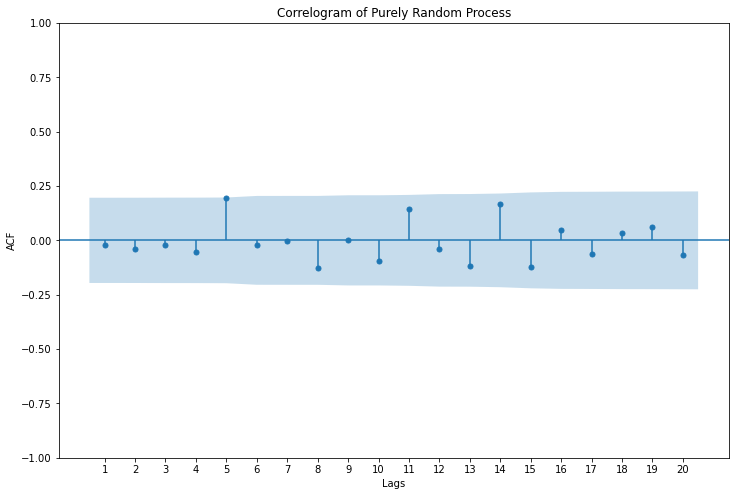

In [15]:
plotACF(random_process, "Correlogram of Purely Random Process")


The autocorrelation function (ACF) for lags 1 to 20 are all inside the 95% confidence interval (not statistically significant). This means the observation at time <i>t</i> is not related to the observation at time <i>t-n</i> (where <i>n</i> = period of lag). The ACF for lag 0 is excluded because it is always equal to 1 (the observation at time <i>t</i> is always correlated with itself).  

Notes: with a 95% CI, it is common to have one out of twenty lags to be statistically significant due to purely random chance.

Random walk process:  
y<sub>t</sub> = y<sub>t-1</sub> + ε<sub>t</sub>  
Where ε<sub>t</sub>: random noise (normally distributed)

Random walk example:  
y<sub>1</sub> = 0  
ε<sub>t</sub> ~ normally distributed with mean=0 and SD=1  
Since y<sub>1</sub> = 0, y<sub>1</sub> = ε<sub>1</sub>, and y<sub>2</sub> = ε<sub>1</sub> + ε<sub>2</sub>; we can describe y<sub>t</sub> as sum of ε<sub>1</sub>, ..., ε<sub>t</sub> (accumulation of the previous noises)

<b>Simulation of random walk</b>

In [16]:
# generate random walk simulation
np.random.seed(42)
noises = np.random.normal(size=1000)
random_walk = np.cumsum(noises)
random_walk = np.insert(random_walk, 0, 0)

# plot the random walk
fig = px.line(
    y=random_walk, labels={"x": "Time", "y": "Value"}, title="<b>Random Walk</b>"
)
fig.show()

# do the ADF test
result = tsa.adfuller(random_walk)
print("ADF test p-value:", result[1])



ADF test p-value: 0.7655598622839761


From the plot, the mean and variance do not seems to be constant. The p-value for ADF test is more than 0.05, so we cannot conclude that the time series is stationary.

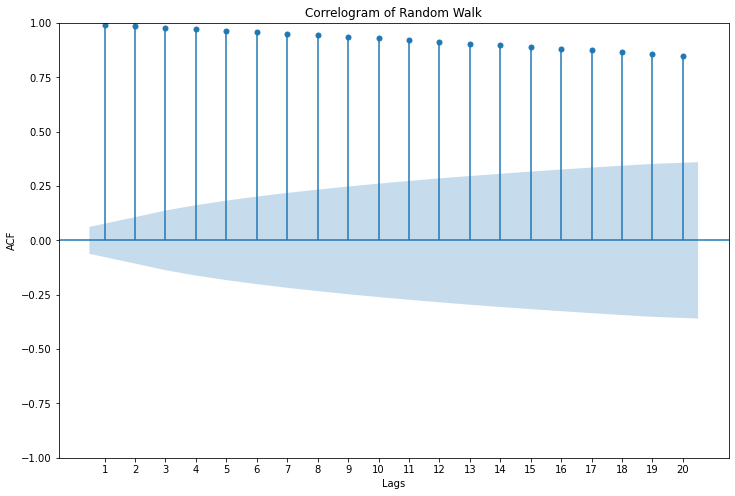

In [17]:
plotACF(random_walk, "Correlogram of Random Walk")


The ACF for lags 1 to 20 are all outside the 95% CI, which means the future observations are correlated to the past observations. The slowly decreasing ACF as lags increase indicates non-stationarity (particularly due to trend).

To remove the trend in random walk, we can make a differenced time series by subtracting y<sub>t</sub> by y<sub>t-1</sub>.

In [18]:
# perform differencing on the random walk
diff_random_walk = np.diff(random_walk)

# plot the differenced random walk
fig = px.line(
    y=diff_random_walk,
    labels={"x": "Time", "y": "Value"},
    title="<b>Differenced Random Walk</b>",
)
fig.show()

# do the ADF test
result = tsa.adfuller(diff_random_walk)
print("ADF test p-value:", result[1])



ADF test p-value: 0.0


Notice how we turn a non-stationary time series (random walk) to a stationary time series by differencing.

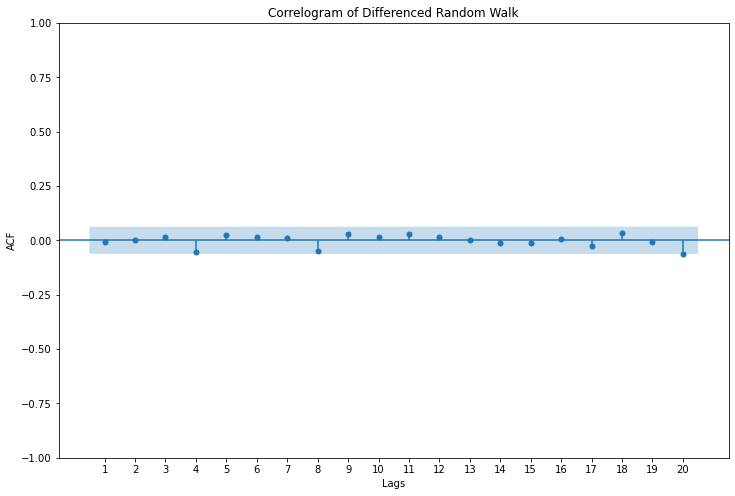

In [19]:
plotACF(diff_random_walk, "Correlogram of Differenced Random Walk")


The ACF for lags 1 to 20 are also now inside the 95% confidence interval.

#### Moving average (MA) process

MA(q) process indicates that the current value depends on the current noise and linear combination of the lagged noises terms.  
y<sub>t</sub> = C + ε<sub>t</sub> + θ<sub>1</sub>ε<sub>t−1</sub> + θ<sub>2</sub>ε<sub>t−2</sub> + ... + θ<sub>q</sub>ε<sub>t−q</sub>   

E.g. in MA(2) process, y<sub>t</sub> = C + ε<sub>t</sub> + θ<sub>1</sub>ε<sub>t−1</sub> + θ<sub>2</sub>ε<sub>t−2</sub>  
So the noises of one-day and two-days back also contribute to the current value.

<b>Simulation of MA(2)</b>

In [20]:
# generate MA(2) process
np.random.seed(42)
noises = np.random.normal(size=1000)
ma_2 = noises[2:] + 0.7 * noises[1:-1] + 0.5 * noises[:-2]

# plot the MA(2) process
fig = px.line(
    y=ma_2,
    labels={"x": "Time", "y": "Value"},
    title="<b>Moving Average with Order of 2</b>",
)
fig.show()

# do the ADF test
result = tsa.adfuller(ma_2)
print("ADF test p-value:", result[1])



ADF test p-value: 3.0548345779728144e-19


From the plot, the mean and variance for MA(2) seems to be constant. The p-value for ADF test is less than 0.05, so we can conclude that the time series is stationary.

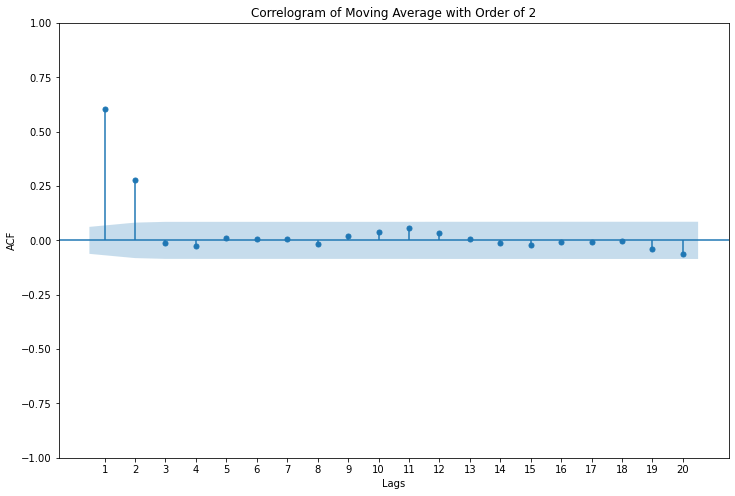

In [21]:
plotACF(ma_2, "Correlogram of Moving Average with Order of 2")


Notice that for MA(2) process, the ACF for lags 1 and 2 are statistically significant. For MA(q) process, the ACF cuts off at lag q. Note that white noise and moving average process are stationary, while random walk is not.

#### Geometric series

Geometric sequence: a<sub>n</sub> = ar<sup>n-1</sup>  
Finite geometric series: a<sub>1</sub> + a<sub>2</sub> + ... + a<sub>n</sub> = a<sub>1</sub> (1 - r<sup>n</sup>) / (1 - r)  
Infinite geometric series: a<sub>1</sub> + a<sub>2</sub> + ... = a<sub>1</sub> / (1 - r), if |r| < 1  
Geometric series is convergent if |r| < 1

#### Backshift notation

Shifting the data by one period:  
By<sub>t</sub> = y<sub>t-1</sub>  
Shifting the data by two periods:  
B(By<sub>t</sub>) = B<sup>2</sup>y<sub>t</sub> = y<sub>t-2</sub>

<hr>  

Backshift operator can be used to describe the process of differencing.  
First order difference:  
y<sub>t</sub>' = y<sub>t</sub> - y<sub>t-1</sub> = y<sub>t</sub> - By<sub>t</sub> = (1 - B)y<sub>t</sub>  
Second order difference:  
y<sub>t</sub>'' = y<sub>t</sub> - 2y<sub>t-1</sub> + y<sub>t-2</sub> = y<sub>t</sub> - 2By<sub>t</sub> + B<sup>2</sup>y<sub>t</sub> = (1 - 2B + B<sup>2</sup>)y<sub>t</sub> =  (1 - B)<sup>2</sup>y<sub>t</sub>  
<i>d</i>th order difference can be written as (1 - B)<sup>d</sup>y<sub>t</sub>

#### Autoregressive (AR) process

AR(p) process indicates that the current value depends on the current noise and linear combination of the lagged values terms.  
y<sub>t</sub> = C + ε<sub>t</sub> + ϕ<sub>1</sub>y<sub>t−1</sub> + ϕ<sub>2</sub>y<sub>t−2</sub> + ... + ϕ<sub>p</sub>y<sub>t−p</sub>  

E.g. in AR(2) process, y<sub>t</sub> = C + ε<sub>t</sub> + ϕ<sub>1</sub>y<sub>t−1</sub> + ϕ<sub>2</sub>y<sub>t−2</sub>  
So the values of one-day and two-days back also contribute to the current value.  

An example of AR process is the random walk we discussed earlier. Note that unlike MA process, AR process is not necessarily stationary.

<b>Simulation of AR(1) with different ϕ</b>

In [22]:
# function to generate ARMA sample
def generate_arma_sample(arparams=0, maparams=0, nsample=1000):
    np.random.seed(42)
    ar = np.r_[1, -arparams]
    ma = np.r_[1, maparams]
    y = tsa.arma_generate_sample(ar, ma, nsample)
    return y


In [23]:
# generate AR(1) process with ϕ = 0.4
y = generate_arma_sample(arparams=0.4, nsample=1000)

# plot the AR(1) process
fig = px.line(
    y=y, labels={"x": "Time", "y": "Value"}, title="<b>AR(1) Process (ϕ = 0.4)</b>"
)
fig.show()

# do the ADF test
result = tsa.adfuller(y)
print("ADF test p-value:", result[1])



ADF test p-value: 0.0


From the plot the trend seems to be constant, while the variance seems to fluctuate a bit.The p-value for ADF test is less than 0.05, so we can conclude that the time series is stationary.

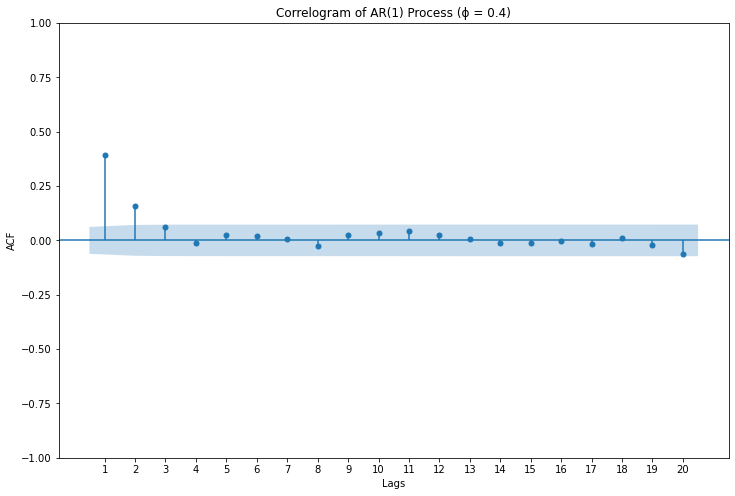

In [24]:
plotACF(y, "Correlogram of AR(1) Process (ϕ = 0.4)")


The ACF decreases rapidly in a geometric fasion.

In [25]:
# generate AR(1) process with ϕ = 1
y = generate_arma_sample(arparams=1, nsample=1000)

# plot the AR(1) process
fig = px.line(
    y=y, labels={"x": "Time", "y": "Value"}, title="<b>AR(1) Process (ϕ = 1)</b>"
)
fig.show()

# do the ADF test
result = tsa.adfuller(y)
print("ADF test p-value:", result[1])



ADF test p-value: 0.7654789696692577


After changing the ϕ from 0.4 to 1, the p-value for ADF test is more than 0.05, so we cannot conclude that the time series is stationary. Notice how changing the ϕ from 0.4 to 1 changes the propoerties of the time series and also the results of ADF test.

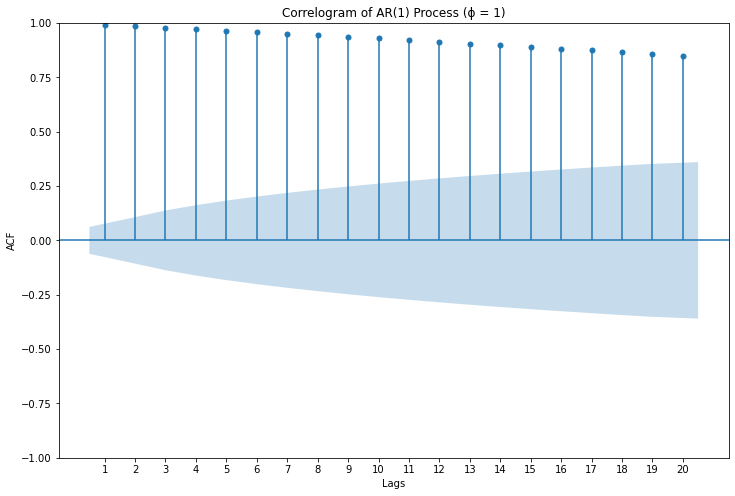

In [26]:
plotACF(y, "Correlogram of AR(1) Process (ϕ = 1)")


Now the ACF decays very slowly, which suggests non-stationarity. A higher magnitude of the ϕ coefficient for an AR process indicates a stronger relationship between the current value and a past value, which in turn results in a slower decay of the ACF values.

<b>Simulation of AR(2) with different ϕ</b>

In [27]:
# generate AR(2) process with ϕ1 = 0.5 and ϕ2 = 0.4
arparams = np.array([0.5, 0.4])
y = generate_arma_sample(arparams=arparams, nsample=1000)

# plot the AR(2) process
fig = px.line(
    y=y,
    labels={"x": "Time", "y": "Value"},
    title="<b>AR(2) Process (ϕ1 = {}, ϕ2 = {})</b>".format(*arparams),
)
fig.show()


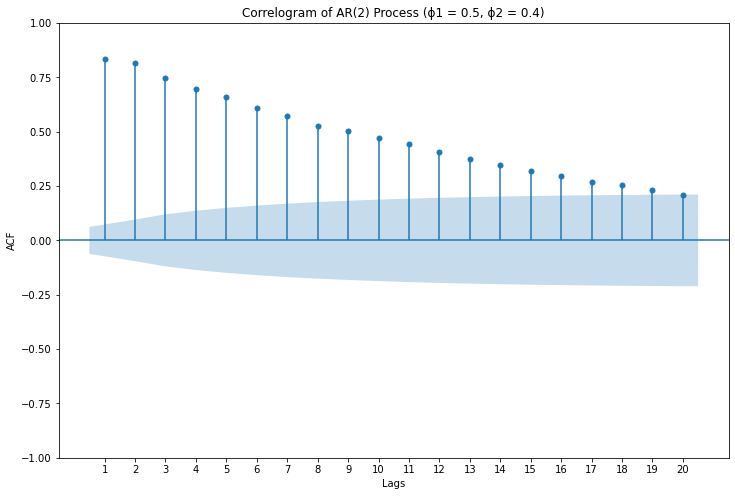

In [28]:
plotACF(y, "Correlogram of AR(2) Process (ϕ1 = {}, ϕ2 = {})".format(*arparams))


In [29]:
# generate AR(2) process with ϕ1 = 0.5 and ϕ2 = -0.4
arparams = np.array([0.5, -0.4])
y = generate_arma_sample(arparams=arparams, nsample=1000)

# plot the AR(2) process
fig = px.line(
    y=y,
    labels={"x": "Time", "y": "Value"},
    title="<b>AR(2) Process (ϕ1 = {}, ϕ2 = {})</b>".format(*arparams),
)
fig.show()


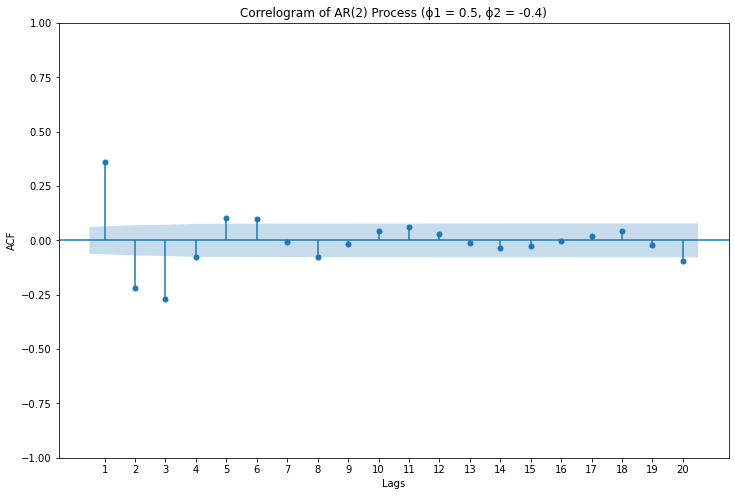

In [30]:
plotACF(y, "Correlogram of AR(2) Process (ϕ1 = {}, ϕ2 = {})".format(*arparams))


When we set ϕ coeffcient to a negative value, the ACF values can be negative.

#### Partial autocorrelation

Partial autocorrelation: measure the relationship between y<sub>t</sub> and y<sub>t-n</sub> after removing the effects of the intermediate lags  
E.g. for AR(3) process: y<sub>t</sub> = C + ε<sub>t</sub> + ϕ<sub>1</sub>t<sub>t-1</sub> + ϕ<sub>2</sub>t<sub>t-2</sub> + ϕ<sub>3</sub>y<sub>t-3</sub>  
The partial autocorrelation with lag of 3 (ϕ<sub>3</sub>) is the correlation between y<sub>t</sub> and y<sub>t-3</sub> after removing the effects of y<sub>t-1</sub> and y<sub>t-2</sub>  

<hr>

Recall that for MA(q) process, the ACF cuts off after q lags. Similarly for AR(p) process, the PACF cuts off after p lags. The values of PACF beyond lag p are expected to be close to zero because the past obsevations beyond the lag p have little effect on the current observation.

<b>Simulation of AR(2)</b>

In [31]:
# generate AR(2) process with ϕ1 = 0.6 and ϕ2 = 0.2
arparams = np.array([0.6, 0.2])
y = generate_arma_sample(arparams=arparams, nsample=1000)

# plot the AR(2) process
fig = px.line(
    y=y,
    labels={"x": "Time", "y": "Value"},
    title="<b>AR(2) Process (ϕ1 = {}, ϕ2 = {})</b>".format(*arparams),
)
fig.show()


In [32]:
# function to plot ACF and PACF
def plotACFandPACF(time_series, title, lags=np.arange(1, 21)):
    fig, ax = plt.subplots(nrows=2, ncols=1)
    fig = sm.graphics.tsa.plot_acf(time_series, lags=lags, ax=ax[0])
    fig = sm.graphics.tsa.plot_pacf(time_series, lags=lags, ax=ax[1])
    fig.suptitle(title)
    fig.axes[0].set_xticks(lags)
    fig.axes[1].set_xticks(lags)
    fig.axes[0].set_ylabel("ACF")
    fig.axes[1].set_ylabel("PACF")
    fig.axes[1].set_xlabel("Lags")

    plt.tight_layout()
    plt.show()


c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



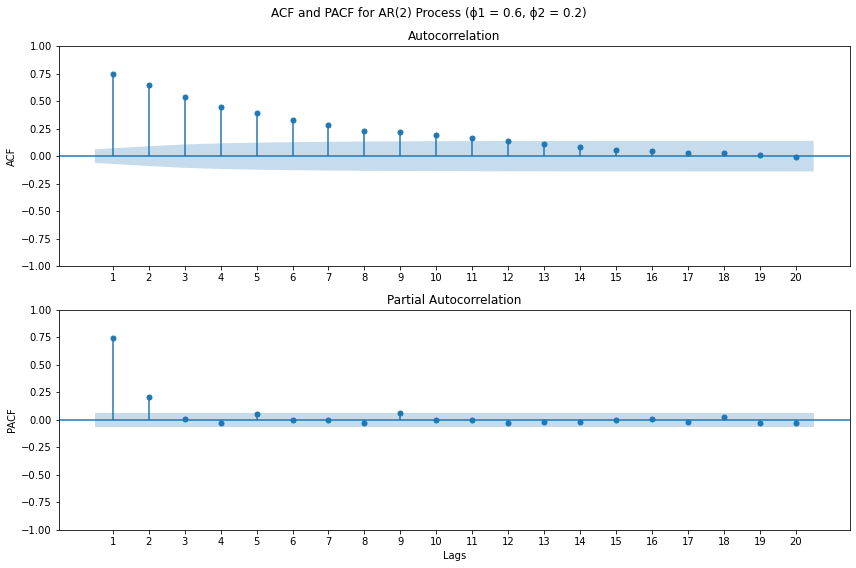

In [33]:
plotACFandPACF(y, "ACF and PACF for AR(2) Process (ϕ1 = {}, ϕ2 = {})".format(*arparams))


For AR(2) process, the PACF cuts off after 2 lags.

<b>Simulation of AR(3)</b>

In [34]:
# generate AR(3) process with ϕ1 = 0.9, ϕ2 = -0.6 and ϕ3 = 0.3
arparams = np.array([0.9, -0.6, 0.3])
y = generate_arma_sample(arparams=arparams, nsample=1000)

# plot the AR(3) process
fig = px.line(
    y=y,
    labels={"x": "Time", "y": "Value"},
    title="<b>AR(3) Process (ϕ1 = {}, ϕ2 = {}, ϕ3 = {})</b>".format(*arparams),
)
fig.show()


c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



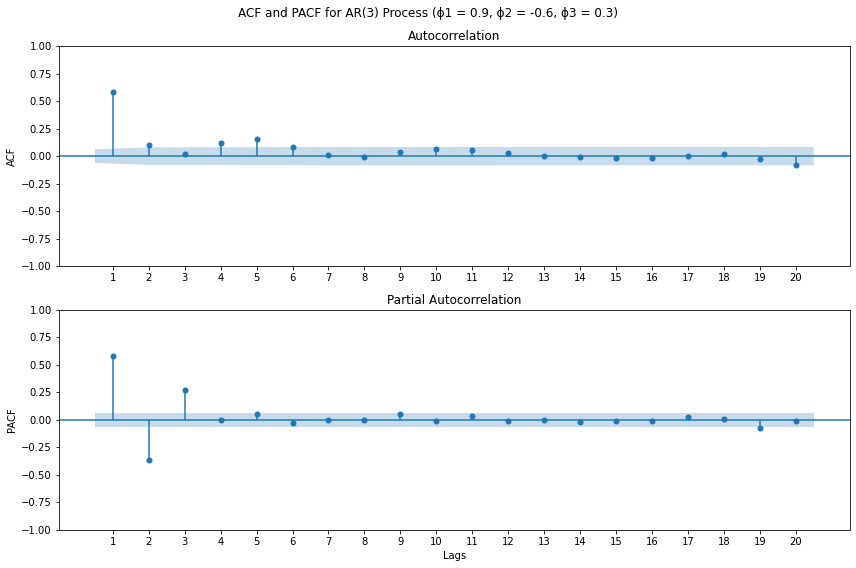

In [35]:
plotACFandPACF(
    y, "ACF and PACF for AR(3) Process (ϕ1 = {}, ϕ2 = {}, ϕ3 = {})".format(*arparams)
)



For AR(3) process, the PACF cuts off after 3 lags.

Estimating the coefficients of the AR(3) process by fitting a model.

In [36]:
# fit the AR(3) model to the previous AR(3) simulation
ar_model = tsa.AutoReg(y, lags=3).fit()
print(ar_model.summary())


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(3)   Log Likelihood               -1393.913
Method:               Conditional MLE   S.D. of innovations              0.979
Date:                Tue, 24 Jan 2023   AIC                           2797.825
Time:                        09:35:12   BIC                           2822.349
Sample:                             3   HQIC                          2807.147
                                 1000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.031      0.612      0.540      -0.042       0.080
y.L1           0.8930      0.030     29.282      0.000       0.833       0.953
y.L2          -0.5775      0.037    -15.454      0.0

Simulation: y<sub>t</sub> = 0 + ε<sub>t</sub> + 0.9</sub>y<sub>t-1</sub> - 0.6</sub>y<sub>t-2</sub> + 0.3</sub>y<sub>t-3</sub> ; S.D. of ε<sub>t</sub> = 1  
Fitted model: y<sub>t</sub> = 0.0190 + ε<sub>t</sub> + 0.8930</sub>y<sub>t-1</sub> - 0.5775</sub>y<sub>t-2</sub> + 0.2700</sub>y<sub>t-3</sub> ; S.D. of ε<sub>t</sub> = 0.979  
The parameters for the fitted model resemble the parameters of the simulation.

We could also estimate the coefficients and variance of the noise manually by using Yule-Walker equations.  

The previous AR(3) process can be written as:  
y<sub>t</sub> = C + ε<sub>t</sub> + ϕ<sub>1</sub>y<sub>t-1</sub> + ϕ<sub>2</sub>y<sub>t-2</sub> + ϕ<sub>3</sub>y<sub>t-3</sub> 

The Yule-Walker equations to estimate the coefficient is:  
$$
\begin{equation}
\left[ \begin{array}{rr} r_{1} \\ r_{2} \\ r_{3} \end{array}\right] 
= \left[ \begin{array}{rr} 1 & r_{1} & r_{2} \\ r_{1} & 1 & r_{1} \\ r_{2} & r_{1} & 1 \end{array}\right]
\left[ \begin{array}{rr} \hat{\phi_{1}} \\ \hat{\phi_{2}} \\ \hat{\phi_{3}} \end{array}\right]
\end{equation}
$$

where r<sub>n</sub> is the partial autocorrelation with lag of n

In [37]:
r = sm.tsa.stattools.acf(y)

r_n = np.zeros((3))
r_n[0] = r[1]
r_n[1] = r[2]
r_n[2] = r[3]
r_n


array([0.58341999, 0.10114266, 0.02311399])

In [38]:
R = np.array([[1, r[1], r[2]], [r[1], 1, r[1]], [r[2], r[1], 1]])
print(R)


[[1.         0.58341999 0.10114266]
 [0.58341999 1.         0.58341999]
 [0.10114266 0.58341999 1.        ]]


In [39]:
phi_hat = np.linalg.solve(R, r_n)
phi_hat


array([ 0.89271185, -0.57683225,  0.26935821])

The ϕ estimation are quite close to the ϕ set for the simulation (0.9, -0.6, 0.3).

The Yule-Walker equations to estimate the variance of the noise is:  
$$
\sigma_{\varepsilon}^{2} = c_{0}(1 - \sum_{i=1}^{p}\phi_{i}r_{i})
$$

where c<sub>0</sub> is the autocovariance (not autocorrelation) at lag 0

In [40]:
c0 = tsa.acovf(y)[0]
sigma = c0 * (1 - np.sum(phi_hat * r_n))
sigma


0.9570036948873076

The variance estimation is quite close to the variance set for the simulation (1).

Let's check the PACF for Moving Average (MA) process.

c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



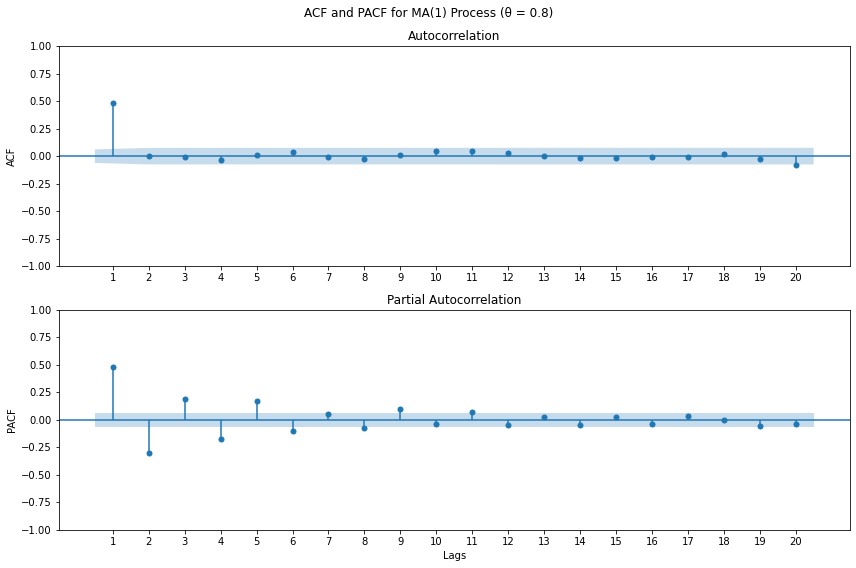

In [41]:
# generate MA(1) process with θ = 0.8
maparams = 0.8
y = generate_arma_sample(maparams=maparams, nsample=1000)

plotACFandPACF(y, "ACF and PACF for MA(1) Process (θ = {})".format(maparams))


For MA process, the PACF usually undergoes geometric decay.

#### Model fitting by looking at ACF and PACF

<b>Example 1</b>

In [42]:
rec_df = astsadata.rec.copy()
rec_df.index = rec_df.index.to_timestamp()
rec_df.head()


,value
index,
1950-01-01,68.63
1950-02-01,68.63
1950-03-01,68.63
1950-04-01,68.63
1950-05-01,68.63


In [43]:
# plot the monthly recruitment
fig = px.line(
    x=rec_df.index,
    y=rec_df.value,
    labels={"x": "Time", "y": "Number of New Fish"},
    title="<b>Monthly Recruitment (1950-1987)</b>",
)
fig.show()


c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



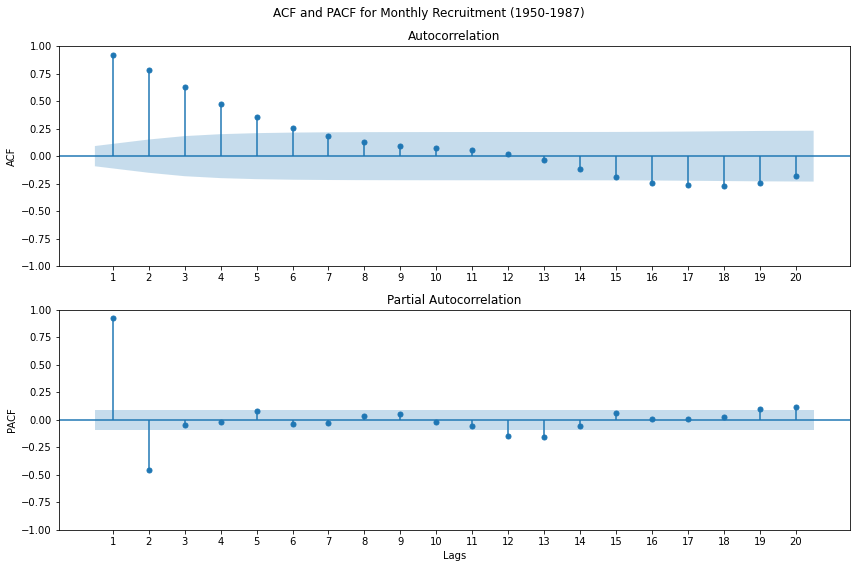

In [44]:
plotACFandPACF(rec_df, "ACF and PACF for Monthly Recruitment (1950-1987)")


ACF decays geometrically, while PACF cuts off after 2 lags. So we will model the time series using AR(2) model.

In [45]:
ar_model = tsa.AutoReg(rec_df, lags=2).fit()
print(ar_model.summary())


                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  453
Model:                     AutoReg(2)   Log Likelihood               -1653.938
Method:               Conditional MLE   S.D. of innovations              9.472
Date:                Tue, 24 Jan 2023   AIC                           3315.877
Time:                        09:35:13   BIC                           3332.322
Sample:                    03-01-1950   HQIC                          3322.358
                         - 09-01-1987                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7371      1.111      6.066      0.000       4.560       8.914
value.L1       1.3541      0.042     32.403      0.000       1.272       1.436
value.L2      -0.4632      0.042    -11.060      0.0

The fitted AR(2) model is:  
y<sub>t</sub> = C + 1.3541y<sub>t-1</sub> - 0.4732y<sub>t-2</sub> + ε<sub>t</sub>  
with S.D. of noise = 9.472

<b>Example 2</b>

In [46]:
jj_df = astsadata.jj.copy()
jj_df.index = jj_df.index.to_timestamp()
jj_df.head()


,value
index,
1960-01-01,0.71
1960-04-01,0.63
1960-07-01,0.85
1960-10-01,0.44
1961-01-01,0.61


In [47]:
px.line(
    x=jj_df.index,
    y=jj_df.value,
    labels={"x": "Time", "y": "EPS"},
    title="<b>Johnson&Johnson Quarterly Earning Per Share (EPS)</b>",
)



There are increasing trend and variance in the time series. So we will apply some transformation to the time series to make it stationary. First we will take the log of the time series, then we will calculate the difference (with lag = 1) of the log time series.

In [48]:
jj_df["log"] = jj_df.value.apply(np.log)
jj_df["log_diff"] = jj_df.log.diff()
jj_df.head()


,value,log,log_diff
index,,,
1960-01-01,0.71,-0.342490,NaN
1960-04-01,0.63,-0.462035,-0.119545
1960-07-01,0.85,-0.162519,0.299517
1960-10-01,0.44,-0.820981,-0.658462
1961-01-01,0.61,-0.494296,0.326684


In [49]:
px.line(
    x=jj_df.index,
    y=jj_df.log_diff,
    labels={"x": "Time", "y": "Log Return"},
    title="<b>Log Return of Johnson&Johnson Quarterly Earning Per Share (EPS)</b>",
)



The trend is removed after the transformation. However we still have some variance in the time series. 

c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



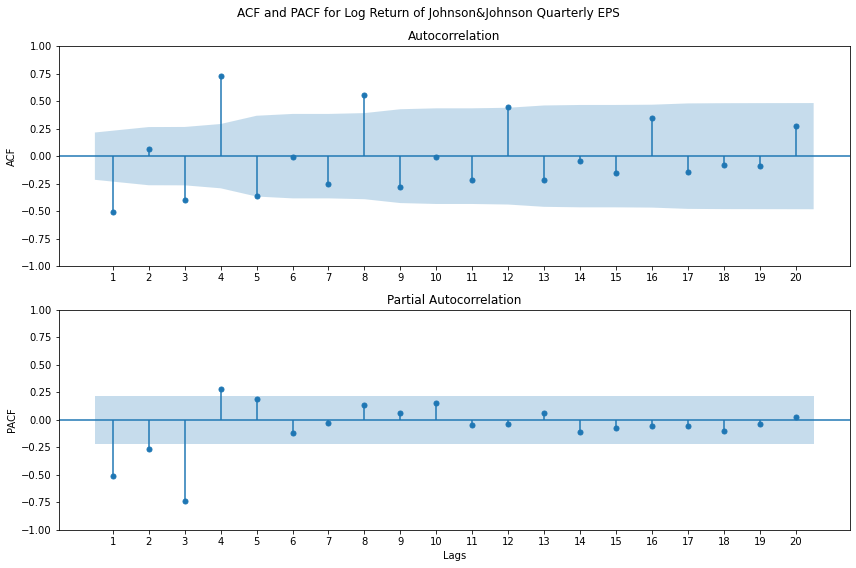

In [50]:
plotACFandPACF(
    jj_df.log_diff.dropna(),
    "ACF and PACF for Log Return of Johnson&Johnson Quarterly EPS",
)



We can try to fit a AR(4) model to the transformed time series. 

In [51]:
ar_model = tsa.AutoReg(jj_df.log_diff.dropna(), lags=4).fit()
print(ar_model.summary())


                            AutoReg Model Results                             
Dep. Variable:               log_diff   No. Observations:                   83
Model:                     AutoReg(4)   Log Likelihood                  87.331
Method:               Conditional MLE   S.D. of innovations              0.080
Date:                Tue, 24 Jan 2023   AIC                           -162.661
Time:                        09:35:14   BIC                           -148.445
Sample:                    04-01-1961   HQIC                          -156.966
                         - 10-01-1980                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1105      0.018      6.312      0.000       0.076       0.145
log_diff.L1    -0.7180      0.104     -6.928      0.000      -0.921      -0.515
log_diff.L2    -0.6479      0.103     -6.280    

The fitted AR(4) model is:  
r<sub>t</sub> = 0.1105 - 0.7180r<sub>t-1</sub> - 0.6479r<sub>t-2</sub> - 0.6077r<sub>t-3</sub> + 0.2337r<sub>t-4</sub> + ε<sub>t</sub>  
where r<sub>t</sub> is the log(y<sub>t</sub> / y<sub>t-1</sub>)  
S.D. of ε<sub>t</sub> = 0.080  

#### Model selection with AIC, AICc, and BIC

Akaike Information Criteria (AIC) and Bayesian Information Criterion (BIC) are measurement of how well a model fits the data, considering the model complexity. The lower the AIC or BIC score, the better the model fits the data.
	
AIC = -2 * LL + 2 * k  
BIC = -2 * LL +  log(n) * k  
where LL = log of likelihood, k = number of parameters, and n = sample size  

AICc is the corrected AIC, which is developed to prevent overfitting for small sample size.

<b>Comparing AIC, AICc and BIC of different models on AR(3) simulation</b>

In [52]:
# function to evaluate AR model with different orders
def eval_ar_models(time_series, max_lags, plot=True):
    eval_dict = {}
    for n in range(1, max_lags + 1):
        ar_model = tsa.AutoReg(time_series, lags=n).fit()
        aic = ar_model.aic
        aicc = ar_model.aicc
        bic = ar_model.bic
        eval_dict[n] = [aic, aicc, bic]

    eval_df = pd.DataFrame(eval_dict, index=["AIC", "AICc", "BIC"])
    eval_df = eval_df.T
    return eval_df


In [53]:
# generate AR(4) process with ϕ1 = 0.6, ϕ2 = 0.4, ϕ3 = 0.8 and ϕ4 = -0.5
arparams = np.array([0.6, 0.4, 0.8, -0.5])
y1 = generate_arma_sample(arparams=arparams, nsample=50)

# evaluate the AR model with different orders
eval_df = eval_ar_models(y1, max_lags=10)

# plot the evaluation
fig = px.line(
    eval_df,
    y=eval_df.columns,
    labels={"index": "Order of AR Model", "value": "Score"},
    title="<b>Model Evaluation for AR(4) Process, n=50</b>",
)
fig.update_layout(legend_traceorder="reversed")
fig.show()


Notice how AIC, AICc and BIC have similar trend. Since we want to prevent overfitting, we don't want to blindly choose the model with the lowest score. We should also consider the model complexity, and in this case order = 4 seems to be a good choice.

#### Autoregressive Moving Average (ARMA) process

ARMA(p, q) process is a combination of AR(p) and MA(q) process. The ARMA(p, q) process is:  
Y<sub>t</sub> = C + ε<sub>t</sub> + ϕ<sub>1</sub>Y<sub>t-1</sub> + ϕ<sub>2</sub>Y<sub>t-2</sub> + ... + ϕ<sub>p</sub>Y<sub>t-p</sub> + θ<sub>1</sub>ε<sub>t-1</sub> + θ<sub>2</sub>ε<sub>t-2</sub> + ... + θ<sub>q</sub>ε<sub>t-q</sub>

<b>Simulation of ARMA(1,1)</b>

In [54]:
# generate ARMA(1,1) process with ϕ1 = 0.7 and θ1 = 0.5
arparams = 0.7
maparams = 0.5
y = generate_arma_sample(arparams, maparams, nsample=1000)

# plot the ARMA(1,1) process
fig = px.line(
    y=y,
    labels={"x": "Time", "y": "Value"},
    title="<b>ARMA(1,1) Process (ϕ<sub>1</sub> = {}, θ<sub>1</sub> = {})</b>".format(
        arparams, maparams
    ),
)
fig.show()


c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



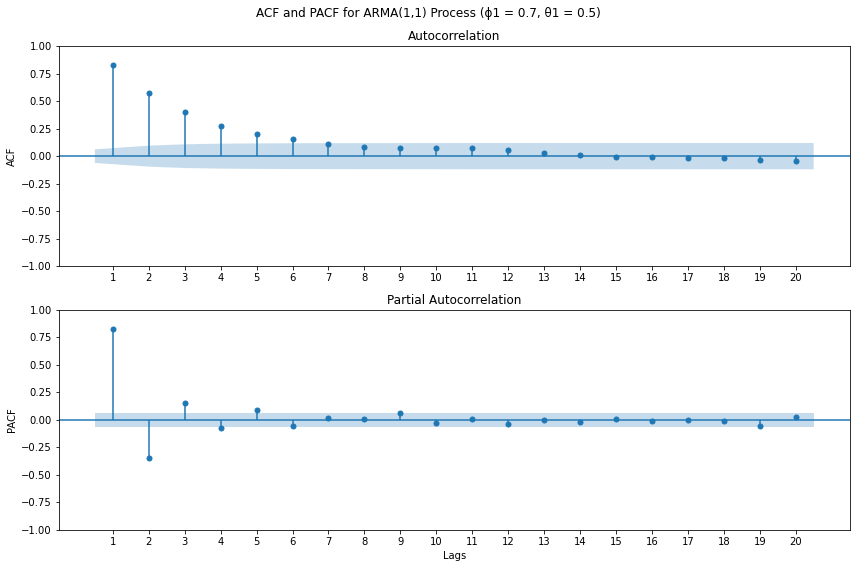

In [55]:
plotACFandPACF(
    y,
    "ACF and PACF for ARMA(1,1) Process (ϕ1 = {}, θ1 = {})".format(arparams, maparams),
)



Notice that both ACF and PACF undergo geometric decay, so we cannot determine the order of the ARMA process by looking at the ACF and PACF.


Summary:
|    |AR(p)              |MA(q)               |ARMA(p,q)      |
|----|-------------------|--------------------|---------------|
|ACF |Geometric decay    |Cuts off after lag q|Geometric decay|
|PACF|Cut off after lag p|Geometric decay     |Geometric decay|

Notes: in practice, the tails off or cuts off is not always very clear. We will have to fit multiple models and compare the AIC, AICc, or BIC scores to determine the best-fitting model.

#### Autoregressive Integrated Moving Average (ARIMA) process

Recall that earlier we removed the trend in random walk by subtracting y<sub>t</sub> by y<sub>t-1</sub>. This process is called differencing.  

So ARIMA(p, d, q) process is an ARMA(p, q) process applied to a differenced time series with order d. Usually d is 1 or 2, because over differencing may result in wrong estimates. A very slow decay in ACF may indicate that we need to apply differencing to the time series.  

We have also described the process of differecing using the backshift operator:  
y<sub>t</sub>' = (1 - B)<sup>d</sup>y<sub>t</sub>  
where d is the order of differencing, and B is the backshift operator.  

ARIMA process can be written using the backshift operator:  
(1 − ϕ<sub>1</sub>B − ... − ϕ<sub>p</sub>B<sup>p</sup>) (1−B)<sup>d</sup> y<sub>t</sub> = c + (1 + θ<sub>1</sub>B + ... + θ<sub>q</sub>B<sup>q</sup>) ε<sub>t</sub>

In [56]:
# generate ARIMA(1, 1, 1) process with ϕ1 = 0.7 and θ1 = 0.5
arparams = 0.7
maparams = 0.5
y = generate_arma_sample(arparams, maparams, nsample=1000)
y = np.cumsum(y)

# plot the ARIMA(1, 1, 1) process
fig = px.line(
    y=y,
    labels={"x": "Time", "y": "Value"},
    title="<b>ARIMA(1, 1, 1) Process (ϕ<sub>1</sub> = {}, θ<sub>1</sub> = {})</b>".format(
        arparams, maparams
    ),
)
fig.show()

# do the ADF test
result = tsa.adfuller(y)
print("ADF test p-value:", result[1])



ADF test p-value: 0.7125581869741355


We can notice a trend in the time series and the p-value of the ADF test is greater than 0.05, which suggests that the time series is not stationary.

c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



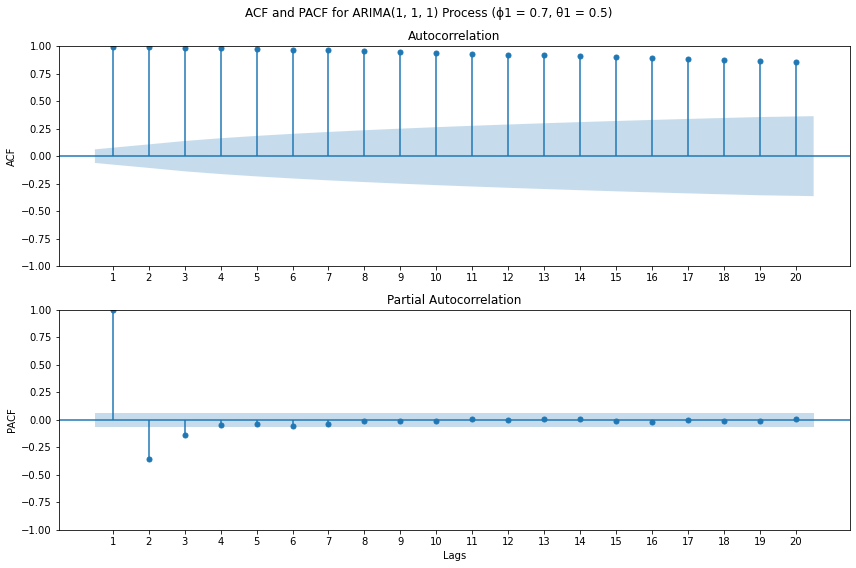

In [57]:
plotACFandPACF(
    y,
    "ACF and PACF for ARIMA(1, 1, 1) Process (ϕ1 = {}, θ1 = {})".format(
        arparams, maparams
    ),
)



The ACF decays very slowly for ARIMA process. Let's differentiate it once to make it stationary.

In [58]:
# differentiate the ARIMA(1, 1, 1) process once
diff_y = np.diff(y)

# plot the differentiated ARIMA(1, 1, 1) process
fig = px.line(
    y=diff_y,
    labels={"x": "Time", "y": "Value"},
    title="<b>Differentiated (d=1) ARIMA(1, 1, 1) Process (ϕ<sub>1</sub> = {}, θ<sub>1</sub> = {})</b>".format(
        arparams, maparams
    ),
)
fig.show()

# do the ADF test
result = tsa.adfuller(diff_y)
print("ADF test p-value:", result[1])



ADF test p-value: 5.5086681848067e-16


c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



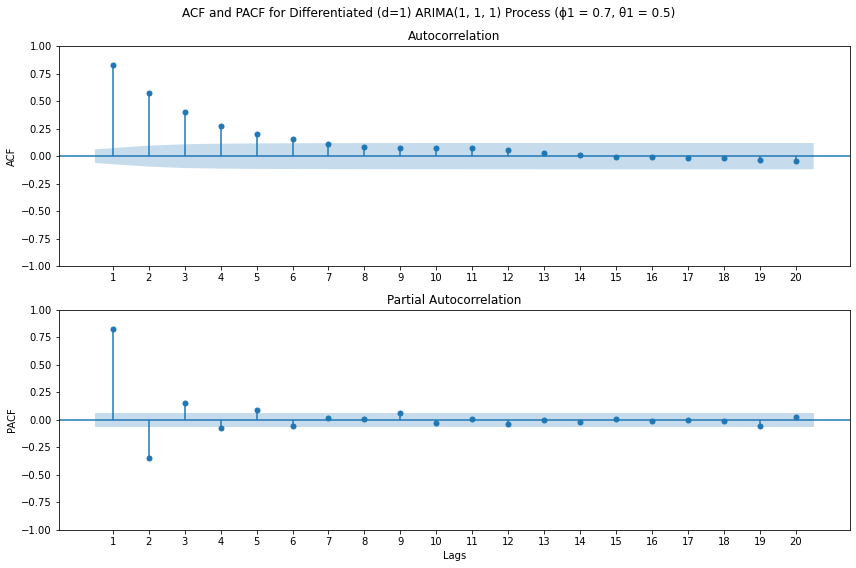

In [59]:
plotACFandPACF(
    diff_y,
    "ACF and PACF for Differentiated (d=1) ARIMA(1, 1, 1) Process (ϕ1 = {}, θ1 = {})".format(
        arparams, maparams
    ),
)



After differencing, the trend is removed and both ACF and PACF decays geometrically.

#### General approach for model selection

![](https://otexts.com/fpp2/arimaflowchart.png)  
Notes: 
* Box-Cox transformation can apply log or exponential function to the time series depending on the value of λ. Besides using Box-Cox transformation, we can also apply the log or exponential function directly to stabilize the variance of the time series.  
* Unit root test is a statistical test to determine if the time series is stationary. Augmented Dickey-Fuller test is usually used for this purpose.  
* AICc can only be used to compare models with the same order of differencing.  
* Portmanteau test is a statistical test to determine if the residuals are independently distributed (white noise). Ljung-Box test is usually used for this purpose, where the null hypothesis states that the residuals are not autocorrelated for a specific lag. When the p-value of Ljung-Box test is above a significance level (0.05 for our purpose), we can conclude that there is no evidence to suggest that the residuals are autocorrelated.  

Source: https://otexts.com/fpp2/arimaflowchart.png

Now let's try to select a model for a real-life dataset using the above framework.

In [60]:
fe_birth_df = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv",
    index_col=0,
)
fe_birth_df.index = pd.to_datetime(fe_birth_df.index)
fe_birth_df.head()


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [61]:
# plot the data
fig = px.line(
    x=fe_birth_df.index,
    y=fe_birth_df.Births,
    labels={"x": "Date", "y": "Number of Births"},
    title="<b>Daily Female Births in California (1959)</b>",
)
fig.show()

# do the ADF test
result = tsa.adfuller(fe_birth_df.Births)
print("ADF test p-value:", result[1])



ADF test p-value: 5.2434129901498554e-05


Although the p-value of ADF test is less than 0.05, it seems that the time series has a bit of trend. Let's try to apply differencing to the time series.

In [62]:
# apply differencing on the time series
fe_birth_df["diff"] = fe_birth_df.Births.diff()

# plot the data
fig = px.line(
    x=fe_birth_df.index,
    y=fe_birth_df["diff"],
    labels={"x": "Date", "y": "Differenced Number of Births"},
    title="<b>Differenced Daily Female Births in California (1959)</b>",
)
fig.show()

# do the ADF test
result = tsa.adfuller(fe_birth_df["diff"].dropna())
print("ADF test p-value:", result[1])



ADF test p-value: 1.5472400091968453e-23


The trend seems to be removed now.

Let's plot the ACF and PACF and determine some candidate models.

c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



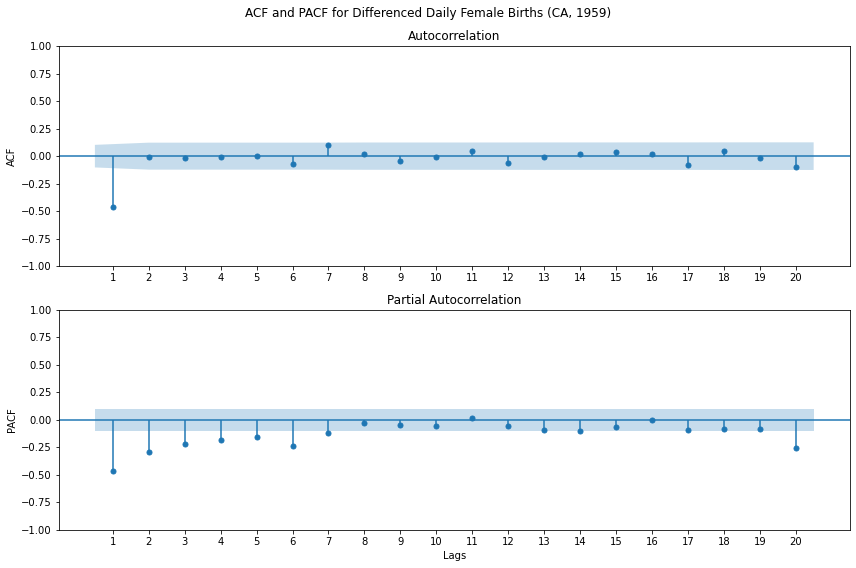

In [63]:
plotACFandPACF(
    fe_birth_df["diff"].dropna(),
    "ACF and PACF for Differenced Daily Female Births (CA, 1959)",
)



Candidate models to be tested:  
ARIMA(0,1,1) - MA(1) for the differenced data  
ARIMA(0,1,2) - MA(2) for the differenced data  
ARIMA(7,1,1) - ARMA(7,1) for the differenced data  
ARIMA(7,1,2) - ARMA(7,2) for the differenced data  

In [64]:
# function to evaluate ARIMA model with different orders
def eval_arima_models(time_series, pdq_list):
    eval_dict = {}
    for p, d, q in pdq_list:
        try:
            model = tsa.ARIMA(time_series, order=(p, d, q)).fit()
            aicc = model.aicc
            series_len = time_series.shape[0] - d
            lb_pval = model.test_serial_correlation(
                method="ljungbox", lags=[np.log(series_len)]
            )[0][1][0]
            eval_dict[f"({p},{d},{q})"] = [aicc, lb_pval]
        except:
            print(f"ARIMA ({p},{d},{q}) is not fitted")
    eval_df = pd.DataFrame(eval_dict, index=["AICc", "Ljung Box p-value"])
    eval_df = eval_df.T
    return eval_df


In [65]:
# ignore warnings and evaluate the ARIMA candidate models
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    pdq_list = [(0, 1, 1), (0, 1, 2), (7, 1, 1), (7, 1, 2)]
    eval_df = eval_arima_models(fe_birth_df.Births, pdq_list)
    display(eval_df.sort_values("AICc"))



,AICc,Ljung Box p-value
"(0,1,2)",2459.637423,0.965824
"(0,1,1)",2462.254166,0.415083
"(7,1,1)",2465.391452,0.999923
"(7,1,2)",2467.289891,0.999943


We will choose ARIMA(0,1,2) for our model because it has the lowest AICc.

In [66]:
model = tsa.ARIMA(fe_birth_df.Births, order=(0, 1, 2)).fit()



c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [67]:
from plotly.subplots import make_subplots


def residual_analysis(fitted_ARIMA, order, seasonal_order=None, lags=20):
    # get model residuals
    p, d, q = order
    if seasonal_order is None:
        P, D, Q, s = (0, 0, 0, 0)
    else:
        P, D, Q, s = seasonal_order

    resid_start = d + (D * s)
    resid = fitted_ARIMA.resid[resid_start:]

    # make subplots
    fig = make_subplots(
        rows=2,
        cols=1,
        subplot_titles=["Residual Plot", "Ljung-Box Test P-values"],
        vertical_spacing=0.15,
    )

    # add residual plot
    residual_plot = go.Scatter(x=resid.index, y=resid, name="Residual", mode="markers")
    fig.add_trace(residual_plot, row=1, col=1)
    fig.update_traces(
        hovertemplate="Time: %{x}<br>Residual: %{y:.5f}<extra></extra>", row=1, col=1
    )

    # calculate p-values for Ljung-Box test
    lb_pvals = fitted_ARIMA.test_serial_correlation(method="ljungbox", lags=lags)[0][1]
    x = [x for x in range(1, lags + 1)]

    # add Ljung-Box test plot
    lb_test_plot = go.Scatter(x=x, y=lb_pvals, name="p-values", mode="markers")
    fig.add_trace(lb_test_plot, row=2, col=1)
    fig.update_traces(
        hovertemplate="Lags: %{x}<br>p-values: %{y:.5f}<extra></extra>", row=2, col=1
    )
    fig.update_yaxes(range=[-0.05, 1.05], row=2, col=1)
    fig.add_hline(y=0.05, line_dash="dash", row=2, col=1)

    # edit layouts
    fig.update_layout(
        title=f"Residual Analysis for Fitted ARIMA({p},{d},{q})({P},{D},{Q})<sub>{s}</sub>",
        title_y=0.96,
        showlegend=False,
    )

    return fig


In [68]:
residual_analysis(model, order=(0, 1, 2))



The residuals seems randomly scattered and do not exhibit any significant pattern, and the p-values for Ljung Box test are all above 0.05. Both are desirable because we want the residuals of the fitted model to resemble white noise.  
Note: The (0,0,0)<sub>0</sub> after (0,1,2) is the component for seasonal ARIMA, which will be discussed later.

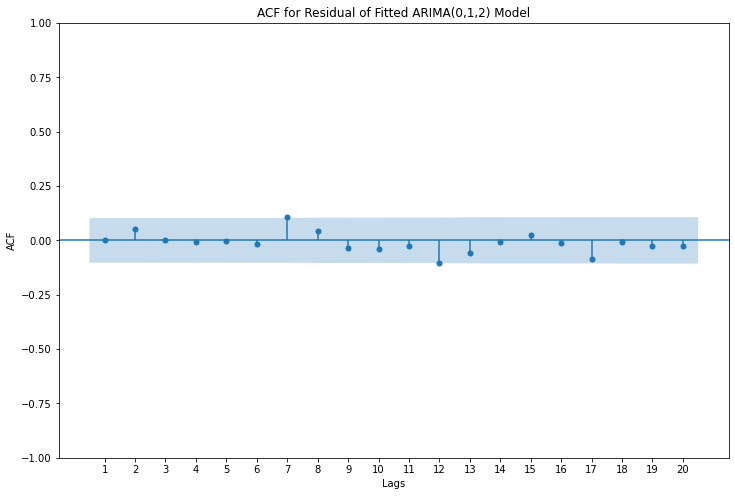

In [69]:
# resid_start is equal to d + (D * s)
resid_start = 1
plotACF(model.resid[resid_start:], "ACF for Residual of Fitted ARIMA(0,1,2) Model")


The ACF for all lags are inside the 95% CI, except for lag of 7 (probably due to random chance). This is desirable as well because it suggests that the residuals are uncorrelated to each other.

Since the residuals look like white noise, we will use model for futher analysis.

In [70]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                  365
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1226.785
Date:                Tue, 24 Jan 2023   AIC                           2459.571
Time:                        09:35:19   BIC                           2471.262
Sample:                    01-01-1959   HQIC                          2464.218
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8478      0.057    -14.943      0.000      -0.959      -0.737
ma.L2         -0.1079      0.058     -1.872      0.061      -0.221       0.005
sigma2        49.2161      3.257     15.109      0.000      42.832      55.600
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                25.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA(0,1,2) can be written as:  
(1−B) y<sub>t</sub> = c + (1 + θ<sub>1</sub>B + θ<sub>2</sub>B<sup>2</sup>) ε<sub>t</sub>  
y<sub>t</sub> = y<sub>t-1</sub> + ε<sub>t</sub> + θ<sub>1</sub>ε<sub>t−1</sub> + θ<sub>2</sub>ε<sub>t−2</sub>

So the fitted model can be represented as:  
y<sub>t</sub> = y<sub>t-1</sub> + ε<sub>t</sub> - 0.8478 ε<sub>t−1</sub> - 0.1079 ε<sub>t−2</sub>  
ε ~ Normal(0, 49.2161)

Let's use the ARIMA(0,1,2) model for forecasting.

In [71]:
# obtain forecast for the next 5 days
fcast = model.get_forecast(steps=5).summary_frame()
fcast


Births,mean,mean_se,mean_ci_lower,mean_ci_upper
1960-01-01,44.328850,7.015420,30.578879,58.078822
1960-01-02,43.765414,7.096188,29.857140,57.673688
1960-01-03,43.765414,7.102975,29.843839,57.686989
1960-01-04,43.765414,7.109755,29.830551,57.700277
1960-01-05,43.765414,7.116528,29.817276,57.713552


In [72]:
# plot the observed data
fig = px.line(
    x=fe_birth_df.index,
    y=fe_birth_df.Births,
    labels={"x": "Date", "y": "Number of Births"},
    title="<b>ARIMA(0,1,2) Forecast of Daily Female Births in California (1959)</b>",
)

# add the forecasted values
fig.add_trace(
    go.Scatter(
        x=fcast.index,
        y=fcast["mean"],
        name="Forecast",
        mode="lines",
        line=dict(color="red", width=2),
    )
)

# add the forecasted confidence interval
fig.add_trace(
    go.Scatter(
        x=fcast.index,
        y=fcast["mean_ci_upper"],
        name="95% CI Upper Bound",
        mode="lines",
        line_width=0,
        marker_color="#999999",
        showlegend=False,
    )
)
fig.add_trace(
    go.Scatter(
        x=fcast.index,
        y=fcast["mean_ci_lower"],
        name="95% CI Lower Bound",
        mode="lines",
        line_width=0,
        marker_color="#999999",
        showlegend=False,
        fillcolor="rgba(153, 153, 153, 0.3)",
        fill="tonexty",
    )
)

# change hover template
fig.update_traces(hovertemplate="Date=%{x}<br>Number of Births=%{y:.2f}")

fig.show()


#### Seasonal ARIMA (SARIMA) process

Data might contain seasonal patterns in addition to correlation with the recent lags. E.g. if a monthly data have a seasonal pattern, the data of January this year might be correlated with the data of January in the previous years. So y<sub>t</sub> depends on y<sub>t-12</sub>, y<sub>t-24</sub>, y<sub>t-36</sub>, etc.

<u>Example</u>  
Pure seasonal ARMA(1,1)<sub>12</sub> can be described as:  
y<sub>t</sub> = ε<sub>t</sub> + Φ<sub>1</sub>y<sub>t-12</sub> + Θ<sub>1</sub>ε<sub>t-12</sub>    
where Φ<sub>1</sub> and Θ<sub>1</sub> are the seasonal autoregressive and seasonal moving average coefficients, respectively.

Seasonal ARIMA(p,d,q)(P,D,Q)<sub>s</sub> has two parts:
* ARIMA(p,d,q) process for the non-seasonal part
* ARIMA(P,D,Q)<sub>s</sub> process for the seasonal part  

Seasonal ARIMA(p,d,q)(P,D,Q)<sub>s</sub> can be written as:  
(1 − Φ<sub>1</sub>B<sup>s</sup> − ... − Φ<sub>P</sub>B<sup>Ps</sup>)(1 − ϕ<sub>1</sub>B − ... − ϕ<sub>p</sub>B<sup>p</sup>) (1−B<sup>s</sup>)<sup>D</sup> (1−B)<sup>d</sup> y<sub>t</sub> = c + (1 + Θ<sub>1</sub>B<sup>s</sup> + ... + Θ<sub>Q</sub>B<sup>Qs</sup>) (1 + θ<sub>1</sub>B + ... + θ<sub>q</sub>B<sup>q</sup>) ε<sub>t</sub>  
Notes: Usually c is set to 0 when d or D is greater than 0.

<u>Example</u>  
ARIMA(0,0,1)(0,0,1)<sub>12</sub> can be described as:  
y<sub>t</sub> = c + (1 + Θ<sub>1</sub>B<sup>12</sup>) (1 + θ<sub>1</sub>B) ε<sub>t</sub>    
y<sub>t</sub> = c + ε<sub>t</sub> + θ<sub>1</sub>ε<sub>t-1</sub> + Θ<sub>1</sub>ε<sub>t-12</sub> + θ<sub>1</sub>Φ<sub>1</sub>ε<sub>t-13</sub>

ARIMA(1,0,0)(1,0,1)<sub>12</sub> can be described as:  
(1 − Φ<sub>1</sub>B<sup>12</sup>)(1 − ϕ<sub>1</sub>B)  y<sub>t</sub> = c + (1 + Θ<sub>1</sub>B<sup>12</sup>) ε<sub>t</sub>    
y<sub>t</sub> = c + ε<sub>t</sub> + ϕ<sub>1</sub>y<sub>t-1</sub> + Φ<sub>1</sub>y<sub>t-12</sub> -  ϕ<sub>1</sub>Φ<sub>1</sub>y<sub>t-13</sub> + Θ<sub>1</sub>ε<sub>t-12</sub>  

ARIMA(1,1,1)(1,1,1)<sub>4</sub> can be described as:  
(1 − Φ<sub>1</sub>B<sup>4</sup>)(1 − ϕ<sub>1</sub>B)(1−B<sup>4</sup>)(1−B) y<sub>t</sub> = (1 + Θ<sub>1</sub>B<sup>4</sup>)(1 + θ<sub>1</sub>B) ε<sub>t</sub>    

Simulation of ARIMA(0,0,1)(0,0,1)<sub>12</sub> process

In [73]:
from scipy.ndimage.interpolation import shift

# generate MA(1) sample with θ = 0.7
np.random.seed(42)
maparams = 0.7
noises = np.random.normal(size=1000)
ma_sample = maparams * noises[1:] + noises[:-1]

# use the MA(0,1) sample to generate ARIMA(0,0,1)(0,0,1)12 sample with θ = 0.7 and Θ = 0.5
maparams_s = 0.5
sarima_sample = (
    ma_sample
    + maparams_s * shift(ma_sample, 12)
    + maparams * maparams_s * shift(ma_sample, 13)
)

# plot the SARIMA sample
fig = px.line(
    y=sarima_sample,
    title="<b>ARIMA(0,0,1)(0,0,1)<sub>12</sub> Process</b>",
    labels={"x": "Time", "y": "Value"},
)
fig.show()


If you zoom in the chart, you will see some repeating patterns every 12 period.

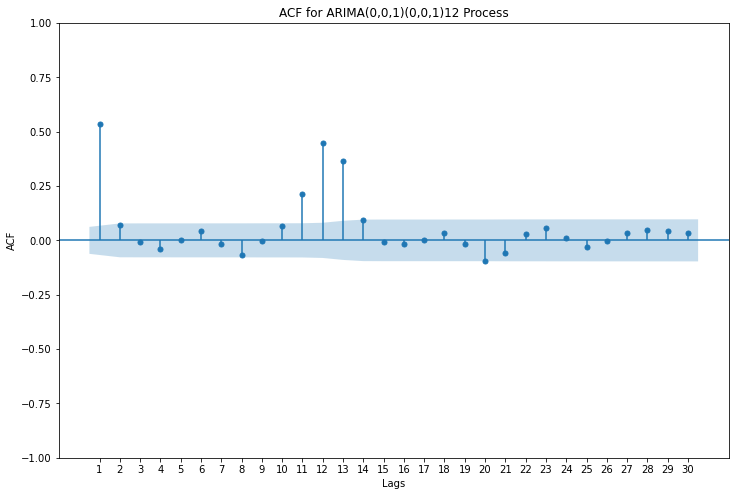

In [74]:
plotACF(sarima_sample, "ACF for ARIMA(0,0,1)(0,0,1)12 Process", lags=np.arange(1, 31))



Notice that for ARIMA(0,0,1,0,0,1)<sub>12</sub> the ACF at lags 1, 11, 12, and 13 are all outisde the 95% CI. Although y<sub>t-11</sub> is not included in the equation, the ACF at lag 11 is non-zero. The mathematical proof can be seen [here](https://online.stat.psu.edu/stat510/lesson/4/4.1#paragraph--296).

#### SARIMA model fitting

##### Johnson & Johnson quarterly earnings dataset

In [75]:
jj_df = astsadata.jj.copy()
jj_df.index = jj_df.index.to_timestamp()
jj_df.head()


,value
index,
1960-01-01,0.71
1960-04-01,0.63
1960-07-01,0.85
1960-10-01,0.44
1961-01-01,0.61


In [76]:
# plot the data
fig = px.line(
    x=jj_df.index,
    y=jj_df["value"],
    title="<b>Quartery Earnings per Share of Johnson & Johnson (1960-1980)</b>",
    labels={"x": "Date", "y": "Earnings per Share"},
)
fig.show()

# do the ADF test
result = tsa.adfuller(jj_df["value"])
print("ADF test p-value:", result[1])



ADF test p-value: 1.0


Based on the plot and ADF test p-value, the time series is non-stationary. We will apply log function to the time series to stabilize the variance, then apply differencing to remove the trend.

In [77]:
jj_df["log"] = jj_df.value.apply(np.log)
jj_df["log_diff"] = jj_df.log.diff()
jj_df.head()


,value,log,log_diff
index,,,
1960-01-01,0.71,-0.342490,NaN
1960-04-01,0.63,-0.462035,-0.119545
1960-07-01,0.85,-0.162519,0.299517
1960-10-01,0.44,-0.820981,-0.658462
1961-01-01,0.61,-0.494296,0.326684


In [78]:
# plot the differenced-transformed data
fig = px.line(
    x=jj_df.index,
    y=jj_df["log_diff"],
    title="<b>Difference Logarithm of Johnson & Johnson Quarterly EPS (1960-1980)</b>",
    labels={"x": "Date", "y": "Log Return"},
)
fig.show()

# do the ADF test
result = tsa.adfuller(jj_df["log_diff"].dropna())
print("ADF test p-value:", result[1])



ADF test p-value: 0.00041497314044405755


Based on the plot, the trend seems to be removed after differencing, but the variance is still not stable. The ADF test p-value is less than 0.05 which suggests that the time series is stationary.

c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



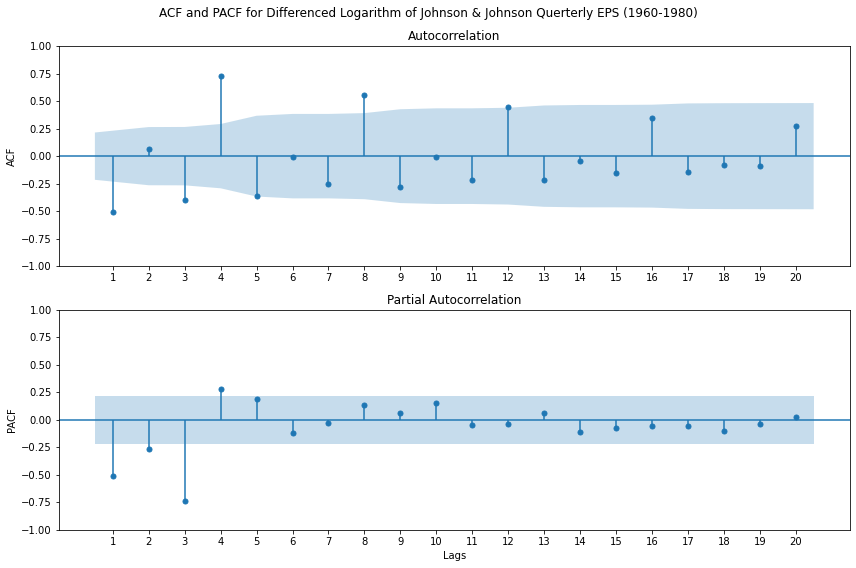

In [79]:
plotACFandPACF(
    jj_df.log_diff.dropna(),
    "ACF and PACF for Differenced Logarithm of Johnson & Johnson Querterly EPS (1960-1980)",
)



We can see a strong ACF at lag 4, 8, and 12 due to seasonality, which suggests that the data have a seasonal period of 4. So we will apply another differencing to remove the seasonal pattern. 

In [80]:
jj_df["log_diff_sdiff"] = jj_df.log_diff.diff(4)
jj_df.head(10)


,value,log,log_diff,log_diff_sdiff
index,,,,
1960-01-01,0.71,-0.342490,NaN,NaN
1960-04-01,0.63,-0.462035,-0.119545,NaN
1960-07-01,0.85,-0.162519,0.299517,NaN
1960-10-01,0.44,-0.820981,-0.658462,NaN
1961-01-01,0.61,-0.494296,0.326684,NaN
1961-04-01,0.69,-0.371064,0.123233,0.242778
1961-07-01,0.92,-0.083382,0.287682,-0.011834
1961-10-01,0.55,-0.597837,-0.514455,0.144006
1962-01-01,0.72,-0.328504,0.269333,-0.057351


In [81]:
# plot the (seasonal and non-seasonal) differenced-transformed data
fig = px.line(
    x=jj_df.index,
    y=jj_df["log_diff_sdiff"],
    title="<b>Differenced (Seasonal and Non-Seasonal) Logarithm of Johnson & Johnson<br>Quarterly EPS (1960-1980)</b>",
    labels={"x": "Date", "y": "Differenced Log of EPS"},
)
fig.show()

# do the ADF test
result = tsa.adfuller(jj_df["log_diff_sdiff"].dropna())
print("ADF test p-value:", result[1])



ADF test p-value: 5.721578695136085e-09


c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



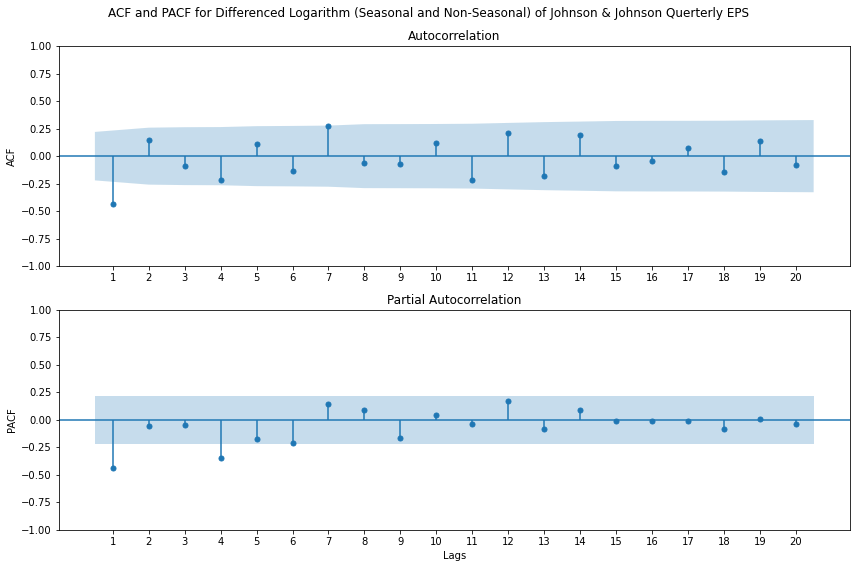

In [82]:
plotACFandPACF(
    jj_df.log_diff_sdiff.dropna(),
    "ACF and PACF for Differenced Logarithm (Seasonal and Non-Seasonal) of Johnson & Johnson Querterly EPS",
)



We can see that the ACF at lag 1 is non-zero, and the ACF at lag 4 is almost significant. The PACF at lag 1 and 4 are non-zero. So we will try the following combination of parameters:  
* p: 0, 1
* d: 1
* q: 0, 1
* P: 0, 1
* D: 1
* Q: 0, 1
* s: 4

In [83]:
# function to evaluate ARIMA model with different orders
def eval_sarima_models(time_series, pdq_list, PDQs_list):
    eval_dict = {}
    for p, d, q in pdq_list:
        for P, D, Q, s in PDQs_list:
            try:
                model = tsa.ARIMA(
                    time_series, order=(p, d, q), seasonal_order=(P, D, Q, s)
                ).fit()
                aicc = model.aicc
                series_len = time_series.shape[0] - (d + (D * s))
                lb_pval = model.test_serial_correlation(
                    method="ljungbox", lags=[np.log(series_len)]
                )[0][1][0]
                eval_dict[f"({p},{d},{q})({P},{D},{Q}){s}"] = [aicc, lb_pval]
            except:
                print(f"ARIMA ({p},{d},{q})({P},{D},{Q}){s}) is not fitted")
    eval_df = pd.DataFrame(eval_dict, index=["AICc", "Ljung Box p-value"])
    eval_df = eval_df.T
    return eval_df


In [84]:
pdq_list = [(0, 1, 0), (0, 1, 1), (1, 1, 0), (1, 1, 1)]
PDQs_list = [(0, 1, 0, 4), (0, 1, 1, 4), (1, 1, 0, 4), (1, 1, 1, 4)]
eval_df = eval_sarima_models(np.log(jj_df["value"]), pdq_list, PDQs_list)
eval_df.sort_values("AICc")


,AICc,Ljung Box p-value
"(0,1,1)(1,1,0)4",-150.593565,0.650491
"(0,1,1)(0,1,1)4",-150.432912,0.551587
"(0,1,1)(1,1,1)4",-148.591296,0.616871
"(1,1,1)(1,1,0)4",-148.377052,0.663803
"(1,1,1)(0,1,1)4",-148.230199,0.535194
"(1,1,1)(1,1,1)4",-146.316556,0.633364
"(1,1,0)(1,1,0)4",-145.711930,0.523502
"(1,1,0)(0,1,1)4",-145.699124,0.503182
"(1,1,1)(0,1,0)4",-145.508574,0.188892
"(0,1,1)(0,1,0)4",-145.356157,0.029299


ARIMA(0,1,1,1,1,0)<sub>4</sub> has the lowest AICc, so we will proceed with this model.

In [85]:
model = tsa.ARIMA(
    np.log(jj_df["value"]), order=(0, 1, 1), seasonal_order=(1, 1, 0, 4)
).fit()



In [86]:
residual_analysis(model, (0, 1, 1), (1, 1, 0, 4))



The residual seems to be scattered randomly and all the Ljung-Box p-values are above 0.05, which is desirable because we want the residuals of the fitted model to resemble white noise.

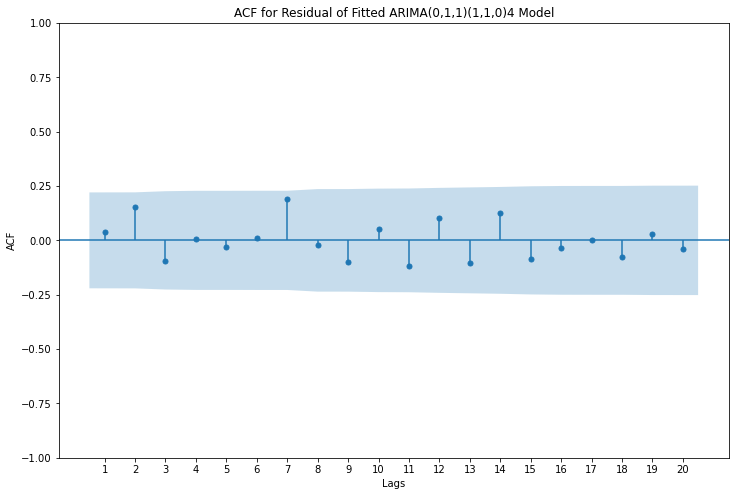

In [87]:
# resid_start is equal to d + (D * s)
resid_start = 1 + (1 * 4)
plotACF(
    model.resid[resid_start:], "ACF for Residual of Fitted ARIMA(0,1,1)(1,1,0)4 Model"
)



The ACF are all inside the 95% CI, which suggests that the residuals are uncorrelated to each other.

In [88]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            value   No. Observations:                   84
Model:             ARIMA(0, 1, 1)x(1, 1, [], 4)   Log Likelihood                  78.457
Date:                          Tue, 24 Jan 2023   AIC                           -150.914
Time:                                  09:35:24   BIC                           -143.805
Sample:                              01-01-1960   HQIC                          -148.066
                                   - 10-01-1980                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6795      0.096     -7.104      0.000      -0.867      -0.492
ar.S.L4       -0.3222      0.108     -2.973      0.003      -0.535      -0.110
sigma2         0.0079      0.002      5.150      0.000       0.005       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.84   Prob(JB):                         0.45
Heteroskedasticity (H):               0.45   Skew:                             0.08
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA(0,1,1)(1,1,0)<sub>4</sub> can be written as:  
(1 − Φ<sub>1</sub>B<sup>4</sup>)(1 − B)<sup>4</sup>(1 − B)y<sub>t</sub> = (1 + θ<sub>1</sub>B)ε<sub>t</sub>  
y<sub>t</sub> = y<sub>t-1</sub> + (Φ + 1)y<sub>t−4</sub> - (Φ + 1)y<sub>t−5</sub> - Φy<sub>t−8</sub> + Φy<sub>t−9</sub> + ε<sub>t</sub> + θ<sub>1</sub>ε<sub>t-1</sub>  

The fitted ARIMA(0,1,1)(1,1,0)<sub>4</sub> can be written as:  
y<sub>t</sub> = y<sub>t-1</sub> + 0.6778y<sub>t−4</sub> - 0.6778y<sub>t−5</sub> + 0.3222y<sub>t−8</sub> - 0.3222y<sub>t−9</sub> + ε<sub>t</sub> - 0.6795</sub>ε<sub>t-1</sub>  
where  
y<sub>t</sub> = log(Quarterly EPS)  
ε ~ Normal(0, 0.0079) 

In [89]:
# obtain forecast for the next 8 quarters
fcast = model.get_forecast(steps=8).summary_frame()

# plot the observed data
fig = px.line(
    x=jj_df.index,
    y=np.log(jj_df["value"]),
    labels={"x": "Date", "y": "Log of EPS"},
    title="<b>ARIMA(0,1,1)(1,1,0)<sub>4</sub> Forecast of Johnson & Johnson Quarterly Log(EPS)</b>",
)

# add the forecasted values
fig.add_trace(
    go.Scatter(
        x=fcast.index,
        y=fcast["mean"],
        name="Forecast",
        mode="lines",
        line=dict(color="red", width=2),
    )
)

# add the forecasted confidence interval
fig.add_trace(
    go.Scatter(
        x=fcast.index,
        y=fcast["mean_ci_upper"],
        name="95% CI Upper Bound",
        mode="lines",
        line_width=0,
        marker_color="#999999",
        showlegend=False,
    )
)
fig.add_trace(
    go.Scatter(
        x=fcast.index,
        y=fcast["mean_ci_lower"],
        name="95% CI Lower Bound",
        mode="lines",
        line_width=0,
        marker_color="#999999",
        showlegend=False,
        fillcolor="rgba(153, 153, 153, 0.3)",
        fill="tonexty",
    )
)

# change hover template
fig.update_traces(hovertemplate="Date=%{x}<br>Log EPS=%{y:.2f}")

fig.show()


##### Milk production dataset

In [90]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv"
milk_df = pd.read_csv(url, index_col=0)
milk_df.index = pd.to_datetime(milk_df.index)
milk_df.head()


,Monthly milk production (pounds per cow)
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [91]:
# plot the data
fig = px.line(
    milk_df,
    title="<b>Monthly Milk Production: Pounds per Cow (1962-1975)</b>",
    labels={"Month": "Time", "value": "Pounds per Cow"},
    hover_data={"variable": False},
)
fig.update_layout(showlegend=False)
fig.show()

# do the ADF test
result = tsa.adfuller(milk_df.iloc[:, 0])
print("ADF test p-value:", result[1])



ADF test p-value: 0.6274267086030318


From the plot, we can see that the time series has trend and seasonality components. The ADF test p-value is greater than 0.05, which suggests that the time series is not stationary.

c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



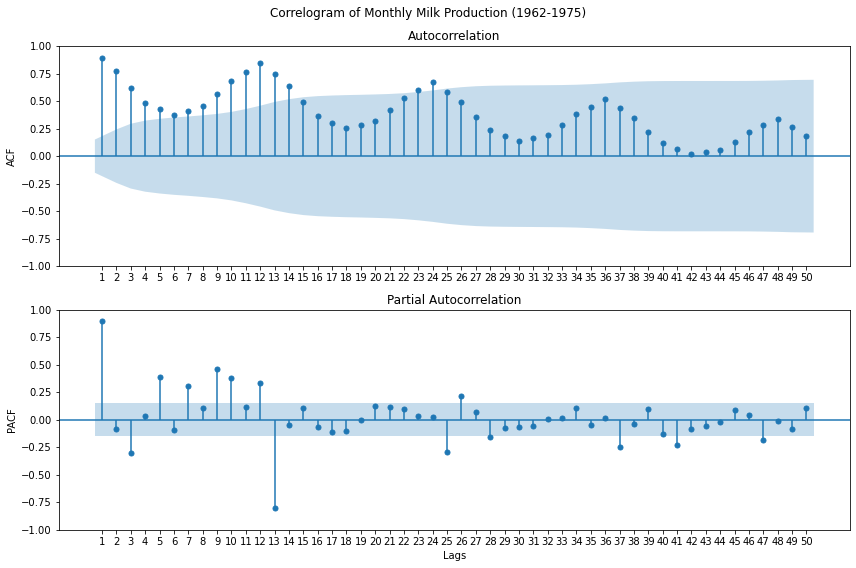

In [92]:
plotACFandPACF(
    milk_df.iloc[:, 0],
    title="Correlogram of Monthly Milk Production (1962-1975)",
    lags=np.arange(1, 51),
)



From the ACF we can see a repeating pattern every 12 lags, which suggests a seasonal period of 12. The slowly decreasing ACF also suggests the presense of trend.

Let's differentiate the time series with d=1 (to remove the trend), and D=1 with s=12 (to remove the sesaonal component).

In [93]:
# perform differencing and seasonal differencing
milk_df["diff"] = milk_df.iloc[:, 0].diff()
milk_df["diff_sdiff"] = milk_df["diff"].diff(12)

# plot the differenced time series
fig = px.line(
    x=milk_df.index,
    y=milk_df["diff_sdiff"],
    title="<b>Differenced Monthly Milk Production: Pounds per Cow (1962-1975)</b>",
    labels={"x": "Time", "y": "Pounds per Cow"},
)
fig.show()

# do the ADF test
result = tsa.adfuller(milk_df["diff_sdiff"].dropna())
print("ADF test p-value:", result[1])



ADF test p-value: 1.865423431878859e-05


From the plot, we can see that the trend is removed, but the variance still has some fluctuations. The ADF test p-value is less than 0.05, which suggests that the time series is stationary.

c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



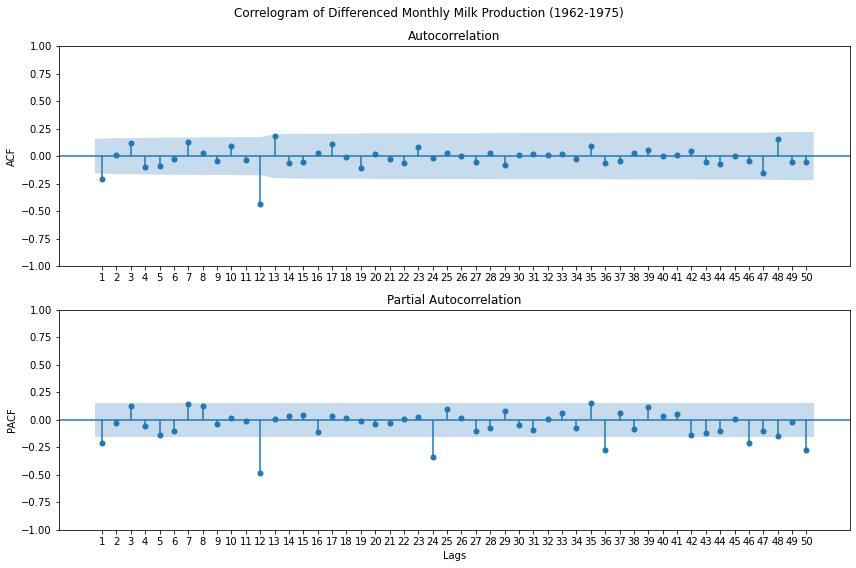

In [94]:
plotACFandPACF(
    milk_df["diff_sdiff"].dropna(),
    title="Correlogram of Differenced Monthly Milk Production (1962-1975)",
    lags=np.arange(1, 51),
)



We can see spikes of ACF at lag 1 and 12, and spikes of PACF at lag 1, 12, 24, and 36. So we will try the following combination of parameters:
* p: 0, 1
* d: 1
* q: 0, 1
* P: 0, 1
* D: 1
* Q: 0, 1, 2, 3
* s: 12

In [95]:
# ignore warnings and evaluate the ARIMA candidate models
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    pdq_list = [(0, 1, 0), (0, 1, 1), (1, 1, 0), (1, 1, 1)]
    PDQs_list = [
        (0, 1, 0, 12),
        (0, 1, 1, 12),
        (0, 1, 2, 12),
        (0, 1, 3, 12),
        (1, 1, 0, 12),
        (1, 1, 1, 12),
        (1, 1, 2, 12),
        (1, 1, 3, 12),
    ]
    eval_df = eval_sarima_models(milk_df.iloc[:, 0], pdq_list, PDQs_list)
    display(eval_df.sort_values("AICc").head(10))


,AICc,Ljung Box p-value
"(1,1,0)(0,1,1)12",1066.366058,0.570328
"(0,1,1)(0,1,1)12",1066.455267,0.574305
"(1,1,0)(0,1,2)12",1068.123434,0.595214
"(1,1,0)(1,1,1)12",1068.179789,0.590999
"(0,1,1)(0,1,2)12",1068.242912,0.586640
"(0,1,1)(1,1,1)12",1068.296193,0.584244
"(1,1,1)(0,1,1)12",1068.330621,0.597488
"(1,1,0)(0,1,3)12",1069.311461,0.612846
"(0,1,1)(0,1,3)12",1069.355183,0.611130
"(1,1,0)(1,1,2)12",1069.570134,0.580302


We will choose the model with lowest AICc, which is ARIMA(1,1,0)(0,1,1)<sub>12</sub>.

In [96]:
model = tsa.ARIMA(
    milk_df.iloc[:, 0], order=(1, 1, 0), seasonal_order=(0, 1, 1, 12)
).fit()



c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [97]:
residual_analysis(model, (1, 1, 0), (0, 1, 1, 12))



The residuals are scattered randomly (asides from the outlier at Jan 1971) and all the Ljung-Box p-values are above 0.05, which is desirable because we want the residuals of the fitted model to resemble white noise.

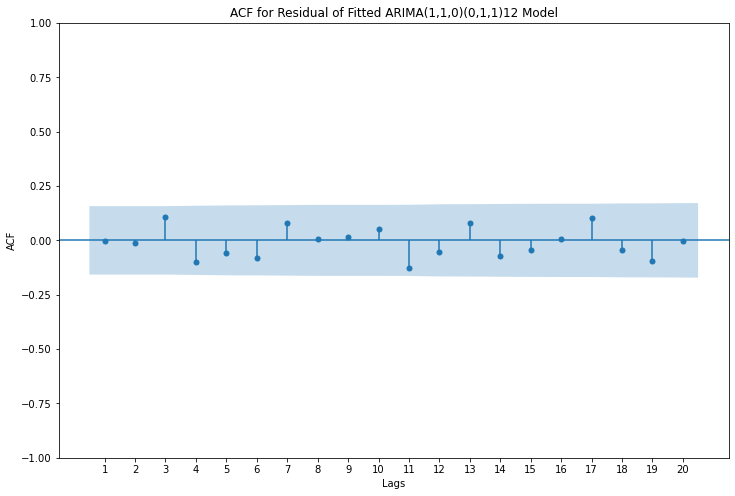

In [98]:
# resid_start is equal to d + (D * s)
resid_start = 1 + (1 * 12)
plotACF(
    model.resid[resid_start:], "ACF for Residual of Fitted ARIMA(1,1,0)(0,1,1)12 Model"
)



The ACF are all inside the 95% CI, which suggests that the residuals are uncorrelated to each other.

In [99]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:     Monthly milk production (pounds per cow)   No. Observations:                  168
Model:                       ARIMA(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.104
Date:                                      Tue, 24 Jan 2023   AIC                           1066.207
Time:                                              09:35:41   BIC                           1075.337
Sample:                                          01-01-1962   HQIC                          1069.916
                                               - 12-01-1975                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2253      0.077     -2.925      0.003      -0.376      -0.074
ma.S.L12      -0.6190      0.070     -8.825      0.000      -0.757      -0.482
sigma2        52.6908      4.897     10.759      0.000      43.093      62.289
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The fitted ARIMA(1,1,0)(0,1,1)<sub>12</sub> can be written as:  
(1 − ϕ<sub>1</sub>B)(1 − B<sup>12</sup>)(1 − B)y<sub>t</sub> = (1 + Θ<sub>1</sub>B<sup>12</sup>)ε<sub>t</sub>  
where  
 ϕ<sub>1</sub> = -0.2253  
 Θ<sub>1</sub> = -0.6190  
 ε ~ Normal(0, 52.6908)



Let's use the fitted model to forecast milk production in the next 12 months.

In [100]:
# obtain forecast for the next 8 quarters
fcast = model.get_forecast(steps=12).summary_frame()

# plot the observed data
fig = px.line(
    x=milk_df.index,
    y=milk_df.iloc[:, 0],
    labels={"x": "Date", "y": "Pounds per Cow"},
    title="<b>ARIMA(1,1,0)(0,1,1)<sub>12</sub> Forecast of Monthly Milk Production: Pounds per Cow (1962-1975)</b>",
    width=1000,
)

# add the forecasted values
fig.add_trace(
    go.Scatter(
        x=fcast.index,
        y=fcast["mean"],
        name="Forecast",
        mode="lines",
        line=dict(color="red", width=2),
    )
)

# add the forecasted confidence interval
fig.add_trace(
    go.Scatter(
        x=fcast.index,
        y=fcast["mean_ci_upper"],
        name="95% CI Upper Bound",
        mode="lines",
        line_width=0,
        marker_color="#999999",
        showlegend=False,
    )
)
fig.add_trace(
    go.Scatter(
        x=fcast.index,
        y=fcast["mean_ci_lower"],
        name="95% CI Lower Bound",
        mode="lines",
        line_width=0,
        marker_color="#999999",
        showlegend=False,
        fillcolor="rgba(153, 153, 153, 0.3)",
        fill="tonexty",
    )
)

# change hover template
fig.update_traces(hovertemplate="Date=%{x}<br>Pounds per Cow=%{y:.2f}")

fig.show()


#### Simple Exponential Smoothing (SES)

Notation:  
$y_{n+h}^{n}$ where data is available until time *n*, while we want a forecast for time *n+h*  

Naive method: $y_{n+1}^{n} = y_{n}$  

Seasonal naive method: $y_{n+1}^{n} = y_{n+1-s}$  

Average method: $y_{n+1}^{n} = \frac{1}{n}\sum_{i=1}^{n}y_{i}$

Simple Exponential Smoothing (SES) forecast the next value based on the weighted previous forecast and current value. SES can be represented as:  

$y_{n+1}^{n} = level_{n} =  \alpha y_{n} + (1-\alpha)level_{n-1}$  

where α represents the weight.  

<u>Example</u>  

$y_{1}^{0} = level_{0}$ 

$y_{2}^{1} = \alpha y_{1} + (1-\alpha)level_{0} = \alpha y_{1} + (1-\alpha)y_{1}^{0}$  

$y_{3}^{2} = \alpha y_{2} + (1-\alpha)level_{1} = \alpha y_{2} + (1-\alpha)y_{2}^{1}$  

$y_{4}^{3} = \alpha y_{3} + (1-\alpha)level_{2} = \alpha y_{3} + (1-\alpha)y_{3}^{2}$  

In SES, the weight assigned to each historical observation decreases exponentially as the observation gets older. The value of α can control the rate of the weight decrease, where a higher α results in a steeper decrease and greater weight to the more recent observations (more responsive to the recent changes in data). Note that SES will give the same forecasted values for all future time points, so it is not suitable for time series with trend and/or seasonality.

Let's use SES for London rainfall dataset.

In [101]:
# reading London rainfall data
read_df = pd.read_csv(
    "https://robjhyndman.com/tsdldata/hurst/precip1.dat",
    skiprows=1,
    delimiter="\s",
    header=None,
)
rain_data = read_df.values.flatten()
rain_data = rain_data[~np.isnan(rain_data)]
rain_df = pd.DataFrame(rain_data, columns=["rainfall (inches)"])
rain_df.index = [y for y in range(1813, 1913)]
rain_df.index = pd.to_datetime(rain_df.index, format="%Y")
rain_df.head()


C:\Users\Marselo\AppData\Local\Temp\ipykernel_8724\2334555723.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,rainfall (inches)
1813-01-01,23.56
1814-01-01,26.07
1815-01-01,21.86
1816-01-01,31.24
1817-01-01,23.65


In [102]:
# plot the data
fig = px.line(
    rain_df,
    title="<b>Annual Rainfall in London (1813-1912)</b>",
    labels={"index": "Time", "value": "Rainfall (inches)"},
    hover_data={"variable": False},
)
fig.update_layout(showlegend=False)
fig.show()


In [103]:
model = tsa.ExponentialSmoothing(rain_df.iloc[:, 0], trend=None, seasonal=None).fit()
model.summary()


c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



Dep. Variable:,rainfall (inches),No. Observations:,100
Model:,ExponentialSmoothing,SSE,1758.465
Optimized:,True,AIC,290.703
Trend:,None,BIC,295.913
Seasonal:,None,AICC,291.124
Seasonal Periods:,None,Date:,"Tue, 24 Jan 2023"
Box-Cox:,False,Time:,09:35:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
initial_level,24.823900,l.0,True


The fitted SES model has an α of 1.49 * 10<sup>-8</sup> and level<sub>0</sub> of 24.8239.

In [104]:
rain_df.mean()


rainfall (inches)    24.8239
dtype: float64

The value of level<sub>0</sub> is the same as the mean of the time series.

In [105]:
model.forecast()


1913-01-01    24.8239
Freq: AS-JAN, dtype: float64

Since the fitted model has a very small α, the fitted model is not responsive to the recent changes in data. Notice that the forecast for the next value is the same as level<sub>0</sub>, which is the average of the entire dataset.

#### Double Exponential Smoothing (DES)

Double Exponential Smoothing (DES) is also known as Holt's Linear Trend Exponential Smoothing. Contrary to SES, DES allow us to deal with time series with trend component. DES can be thought as a combination of level (smoothed value of the time series) and trend (expected increase or decrease over the next lag). DES can be represented as:  

<u>Forecast equation</u>  
$\hat{y}_{n+1} = level_{n} + trend_{n}$  

<u>Level equation</u>  
$level_{n} = \alpha y_{n} + (1-\alpha)(level_{n-1} + trend_{n-1})$

<u>Trend equation</u>  
$trend_{n} = \beta (level_{n} - level_{n-1}) + (1-\beta)trend_{n-1}$  

where α represents the weight of level and β represents the weight of trend.  

Let's use DES for US GDP dataset.

In [106]:
gdp_df = pd.read_csv(
    "https://raw.githubusercontent.com/datasets/gdp-us/master/year.csv",
    usecols=[0, 1],
    index_col=0,
)
gdp_df.index = pd.to_datetime(gdp_df.index, format="%Y")
gdp_df.columns = ["gdp (billions)"]
gdp_df.head()


,gdp (billions)
date,
1930-01-01,92.2
1931-01-01,77.4
1932-01-01,59.5
1933-01-01,57.2
1934-01-01,66.8


In [107]:
# plot the data
fig = px.line(
    gdp_df,
    title="<b>US GDP (1930-2016)</b>",
    labels={"date": "Time", "value": "GDP (billions)"},
    hover_data={"variable": False},
)
fig.update_layout(showlegend=False)
fig.show()


We can definitely see a trend in the time series.

In [108]:
model = tsa.ExponentialSmoothing(gdp_df.iloc[:, 0], trend="add").fit()
model.summary()


c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



Dep. Variable:,gdp (billions),No. Observations:,87
Model:,ExponentialSmoothing,SSE,1583579.774
Optimized:,True,AIC,861.408
Trend:,Additive,BIC,871.272
Seasonal:,None,AICC,862.458
Seasonal Periods:,None,Date:,"Tue, 24 Jan 2023"
Box-Cox:,False,Time:,09:35:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.3079762,beta,True


The α (0.995) is very large, so our model will give large weights to the recent levels. The β (0.308) is not too large or too small, so our model will give moderate weights to the recent and older trends.

In [109]:
# plot the data and the predicted values
fig = px.line(
    gdp_df,
    title="<b>US GDP (1930-2016)</b>",
    labels={"date": "Time", "value": "GDP (billions)"},
    hover_data={"variable": False},
)
fig.data[0].name = "Real Values"
fig.add_trace(
    go.Scatter(
        x=model.fittedvalues.index,
        y=model.fittedvalues,
        name="Predicted Values",
        mode="lines",
        line_dash="dot",
    )
)
fig.show()


The DES model fits quite well with the actual data, although the model won't be able to predict the GDP decrease due to recession in 2008.

#### Triple Exponential Smoothing

Triple Exponential Smoothing (TES) is also known as Holt-Winters Exponential Smoothing. TES is an extension of DES that allows us to deal with not only trend, but also seasonality. TES can be represented as:  

* **Additive method**  

    <u>Forecast</u>  
    $\hat{y}_{n+h} = level_{n} + h * trend_{n} + seasonal_{n+h-m(k+1)}$  

    <u>Level equation</u>  
    $level_{n} = \alpha (y_{n} - seasonal_{n-m}) + (1-\alpha)(level_{n-1} + trend_{n-1})$  

    <u>Trend equation</u>  
    $trend_{n} = \beta (level_{n} - level_{n-1}) + (1-\beta)trend_{n-1}$  

    <u>Seasonal equation</u>  
    $seasonal_{n} = \gamma (y_{n} - level_{n-1} - trend_{n-1}) + (1-\gamma)seasonal_{n-m}$  

    The additive model is used when the seasonal variation is relatively constant over time  
	
* **Multiplicative method**  

    <u>Forecast</u>  
    $\hat{y}_{n+h} = (level_{n} + h * trend_{n}) * seasonal_{n+h-m(k+1)}$   

    <u>Level equation</u>  
    $level_{n} = \alpha \frac{y_{n}}{seasonal_{n-m}} + (1-\alpha)(level_{n-1} + trend_{n-1})$  

    <u>Trend equation</u>  
    $trend_{n} = \beta (level_{n} - level_{n-1}) + (1-\beta)trend_{n-1}$  

    <u>Seasonal equation</u>  
    $seasonal_{n} = \gamma \frac{y_{n}}{(level_{n-1} + trend_{n-1})} + (1-\gamma)seasonal_{n-m}$  

    The multiplicative model is used when the seasonal variation increases/ decreases over time (proportional to the level) 

Notes: 
* γ represents the weight of seasonality and m represents the seasonal period.  
* k is the modulo of (h - 1) by m, and is included in the forecast equation to ensure that the latest seasonal index from the sample is used.

Let's use TES for air passengers dataset.

In [110]:
air_df = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
    index_col=0,
)
air_df.index = pd.to_datetime(air_df.index, format="%Y-%m")
air_df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [111]:
# plot the data
fig = px.line(
    air_df,
    title="<b>Airline Passengers (1949-1960)</b>",
    labels={"date": "Time", "value": "Passengers (thousands)"},
    hover_data={"variable": False},
)
fig.update_layout(showlegend=False)
fig.show()


We can see increasing trend and increasing seasonal variance in the time series. We will apply log transformation to the time series to reduce the seasonal variance.

In [112]:
# log transform the data to stabilize the variance
fig = px.line(
    x=air_df.index,
    y=np.log(air_df.Passengers),
    title="<b>Log Transformed Airline Passengers (1949-1960)</b>",
    labels={"x": "Time", "y": "log(Passengers in thousands)"},
)
fig.show()


The variation of seasonal component is reduced after applying log transformation.

In [113]:
model = tsa.ExponentialSmoothing(
    np.log(air_df.Passengers), trend="add", seasonal="add"
).fit()
model.summary()


c:\Users\Marselo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Dep. Variable:,Passengers,No. Observations:,144
Model:,ExponentialSmoothing,SSE,0.193
Optimized:,True,AIC,-920.894
Trend:,Additive,BIC,-873.377
Seasonal:,Additive,AICC,-915.422
Seasonal Periods:,12,Date:,"Tue, 24 Jan 2023"
Box-Cox:,False,Time:,09:35:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3778209,alpha,True
smoothing_trend,1.0087e-17,beta,True


Note that we have 12 seasonal indices, one for each month.

The forecast in January 1961 (one step ahead of the latest available data) can be calculated by:  
$\hat{y}_{n+h} = level_{n} + h * trend_{n} + seasonal_{n+h-m(k+1)}$  
$\hat{y}_{144+1} = level_{144} + 1 * trend_{144} + seasonal_{144+1-12}$  

In [114]:
# calculate the forecasted values for January 1961, note that index starts at 0
model.level[143] + model.trend[143] + model.season[143 + 1 - 12]



6.112513728586647

We can cross check the forecasted value we calculate manually with the forecasted value returned automatically by the model.

In [115]:
model.forecast()


1961-01-01    6.112514
Freq: MS, dtype: float64

In [116]:
# plot the data and the predicted values
fig = px.line(
    x=air_df.index,
    y=np.log(air_df.Passengers),
    title="<b>Log Transformed Airline Passengers (1949-1960)</b>",
    labels={"x": "Time", "y": "log(Passengers in thousands)"},
)
fig.data[0].name = "Real Values"
pred = model.predict(start=0, end=155)
fig.add_trace(
    go.Scatter(
        x=pred.index,
        y=pred.values,
        name="Predicted Values",
        mode="lines",
        line_dash="dot",
    )
)
fig.update_traces(showlegend=True)
fig.show()


The TES model can capture the trend and seasonality pretty well.

#### Decomposition of time series